# 데이터 불러오기 

In [6]:
import pandas as pd

# 1. CSV 파일 경로
file_path = 'olist_customers_dataset.csv'  # 실제 파일명/경로로 수정

# 2. CSV 파일 로드
try:
    df = pd.read_csv(file_path)
    print("CSV 로드 성공")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")

# 3. 결측치 제거
# 모든 컬럼 기준으로 결측치가 있는 행 제거
df = df.dropna()
print("결측치 제거 완료")

# 4. 데이터 확인
print(df.info())
print(df.head())


CSV 로드 성공
결측치 제거 완료
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   



결측값 확인 

In [14]:
df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('olist_customers_dataset.csv')

# 결측치 제거
df_cleaned = df.dropna()

# 고객별 주문 횟수 집계
customer_orders = df_cleaned.groupby('customer_unique_id').size().reset_index(name='order_count')

# 기본 통계치 확인
stats = customer_orders['order_count'].describe()
print("주문 횟수 기본 통계치:\n", stats)

# 상위 10명 주문 많은 고객
top_customers = customer_orders.sort_values(by='order_count', ascending=False).head(10)
print("\n주문 횟수 상위 10 고객:\n", top_customers)

# 하위 10명 주문 적은 고객
bottom_customers = customer_orders.sort_values(by='order_count', ascending=True).head(10)
print("\n주문 횟수 하위 10 고객:\n", bottom_customers)


주문 횟수 기본 통계치:
 count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: order_count, dtype: float64

주문 횟수 상위 10 고객:
                      customer_unique_id  order_count
52973  8d50f5eadf50201ccdcedfb9e2ac8455           17
23472  3e43e6105506432c953e165fb2acf44c            9
10354  1b6c7548a2a1f9037c1fd3ddfed95f33            7
37797  6469f99c1f9dfae7733b25662e7f1782            7
76082  ca77025e7201e3b30c44b472ff346268            7
27043  47c1a3033b8b77b3ab6e109eb4d5fdf3            6
7175   12f5d6e1cbf93dafd9dcc19095df0b3d            6
37585  63cfc61cee11cbe306bff5857d00bfe4            6
82883  dc813062e0fc23409cd255f7f53c7074            6
83540  de34b16117594161a6a89c50b289d35a            6

주문 횟수 하위 10 고객:
                   customer_unique_id  order_count
16  000c8bdb58a29e7115cfc257230fb21b            1
17  000d460961d6dbfa3ec6c9f5805769e1            1
18  00

상위고객이 6~17회까지 반복구매함 6~10회는 분포상높음 17은 확실히 이상치 있음 

# 그럼 이상치 제거 해야겠지 

In [ ]:
Q1 = customer_orders['order_count'].quantile(0.25)
Q3 = customer_orders['order_count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = customer_orders[(customer_orders['order_count'] > upper_bound) | 
                           (customer_orders['order_count'] < lower_bound)]
print(outliers)


                     customer_unique_id  order_count
33     00172711b30d52eea8b313a7f2cced02            2
106    004288347e5e88a27ded2bb23747066c            2
124    004b45ec5c64187465168251cd1c9c2f            2
144    0058f300f57d7b93c477a131a59b36c3            2
249    00a39521eb40f7012db50455bf083460            2
...                                 ...          ...
95784  ff36be26206fffe1eb37afd54c70e18b            3
95810  ff44401d0d8f5b9c54a47374eb48c1b8            2
95916  ff8892f7c26aa0446da53d01b18df463            2
95934  ff922bdd6bafcdf99cb90d7f39cea5b3            3
96050  ffe254cc039740e17dd15a5305035928            2

[2997 rows x 2 columns]


이상치를 제거한값 6~17까지를 제거  

# 파생변수 생성 

In [ ]:
import pandas as pd

# 1. CSV 불러오기
df = pd.read_csv('olist_customers_dataset.csv')

# 2. 고객별 주문 횟수 계산 (customer_id 기준)
customer_orders = df.groupby('customer_unique_id').size().reset_index(name='order_count')

# 3. 재구매 여부 파생 변수
customer_orders['is_repeat'] = customer_orders['order_count'] > 1

# 4. 구매 그룹 (Low / Medium / High) - cut 사용, 안전하게 구간 지정
# 구간 예시: 1회 = Low, 2~3회 = Medium, 4회 이상 = High
bins = [0, 1, 3, customer_orders['order_count'].max()]
labels = ['Low', 'Medium', 'High']
customer_orders['purchase_group'] = pd.cut(customer_orders['order_count'], bins=bins, labels=labels, include_lowest=True)

# 5. 고객 점수 (purchase_group 기반)
score_map = {'Low':10, 'Medium':50, 'High':100}
customer_orders['customer_score'] = customer_orders['purchase_group'].map(score_map)

# 6. 결과 확인
print(customer_orders.head(20))

# 7. 상위 20명 고객 확인 (점수 높은 순)
top_customers = customer_orders.sort_values(by='customer_score', ascending=False).head(20)
print(top_customers)



                  customer_unique_id  order_count  is_repeat purchase_group  \
0   0000366f3b9a7992bf8c76cfdf3221e2            1      False            Low   
1   0000b849f77a49e4a4ce2b2a4ca5be3f            1      False            Low   
2   0000f46a3911fa3c0805444483337064            1      False            Low   
3   0000f6ccb0745a6a4b88665a16c9f078            1      False            Low   
4   0004aac84e0df4da2b147fca70cf8255            1      False            Low   
5   0004bd2a26a76fe21f786e4fbd80607f            1      False            Low   
6   00050ab1314c0e55a6ca13cf7181fecf            1      False            Low   
7   00053a61a98854899e70ed204dd4bafe            1      False            Low   
8   0005e1862207bf6ccc02e4228effd9a0            1      False            Low   
9   0005ef4cd20d2893f0d9fbd94d3c0d97            1      False            Low   
10  0006fdc98a402fceb4eb0ee528f6a8d4            1      False            Low   
11  00082cbe03e478190aadbea78542e933            1   

이렇게 나온이유 1회구매자 가 압도적인 수를 보유하고 있기때문으로 추정된다.

 지금상태에서 우리가 얻을수있는 정보는 제한적이다. ㅅㅂ 

In [ ]:
data['customer_unique_id'].duplicated().sum()

np.int64(3345)

상위도시별 고객수

상위 10개 도시별 고객 수:
                      도시   고객 수
0              sao paulo  15540
1         rio de janeiro   6882
2         belo horizonte   2773
3               brasilia   2131
4               curitiba   1521
5               campinas   1444
6           porto alegre   1379
7               salvador   1245
8              guarulhos   1189
9  sao bernardo do campo    938
------------------------------


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17136\977232699.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')


그래프가 'customer_distribution.png' 파일로 저장되었습니다.


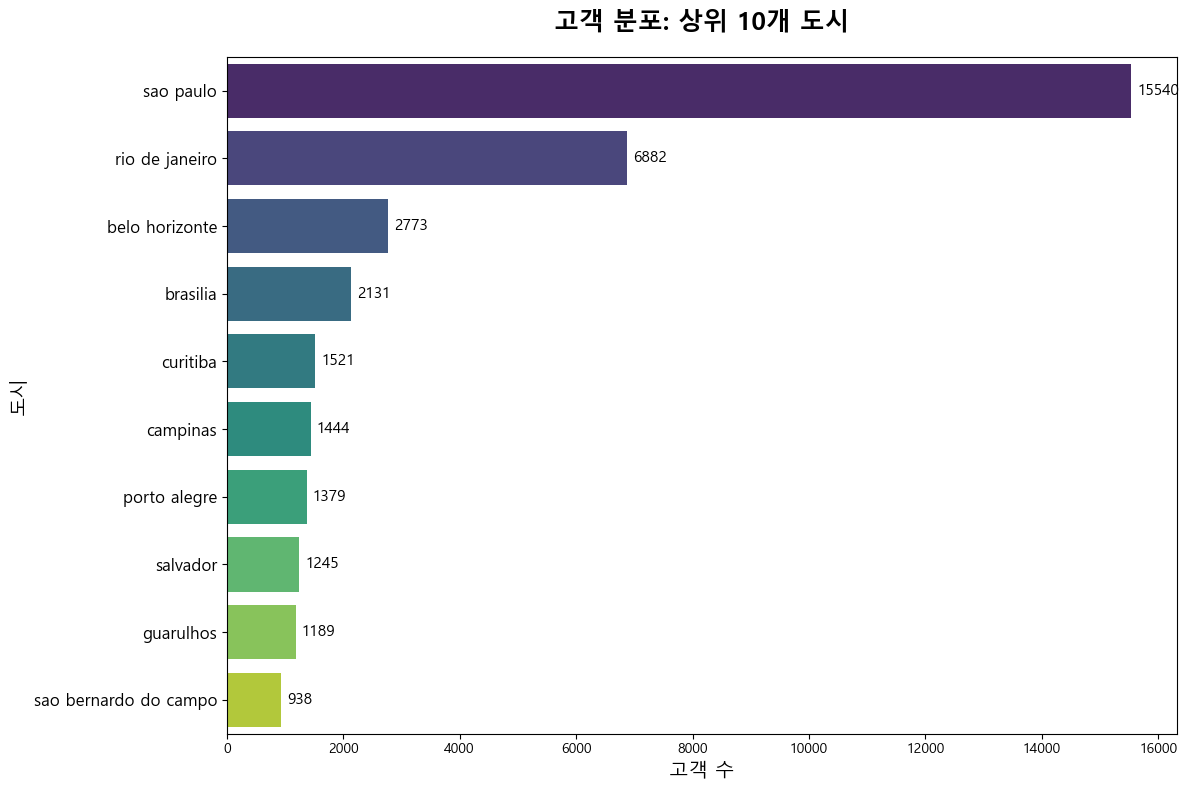

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 사용자의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 데이터 불러오기
# 'olist_customers_dataset.csv' 파일을 읽어와 데이터프레임(df)으로 저장합니다.
df = pd.read_csv('olist_customers_dataset.csv')

# 2. 도시별 고객 수 계산
# 'customer_city' 컬럼을 기준으로 각 도시의 고유 고객 수를 계산합니다.
# value_counts()는 각 고유값의 개수를 세어주는 유용한 함수입니다.
city_counts = df['customer_city'].value_counts()

# 3. 상위 10개 도시 데이터 추출 및 CSV로 저장
# 계산된 도시별 고객 수에서 가장 많은 상위 10개 도시를 선택합니다.
top_10_cities = city_counts.nlargest(10)
top_10_cities_df = top_10_cities.reset_index()
# 컬럼 이름을 '도시'와 '고객 수'로 명확하게 변경합니다.
top_10_cities_df.columns = ['도시', '고객 수']

# 결과를 'top_10_cities.csv' 파일로 저장합니다. (인코딩 설정으로 한글 깨짐 방지)
top_10_cities_df.to_csv('top_10_cities.csv', index=False, encoding='utf-8-sig')

# 4. 데이터 확인
print("상위 10개 도시별 고객 수:")
print(top_10_cities_df)
print("-" * 30)

# 5. 시각화: 상위 10개 도시 막대 그래프
# 그래프의 크기를 설정하여 시원한 느낌을 줍니다.
plt.figure(figsize=(12, 8))

# Seaborn의 barplot을 사용하여 막대 그래프를 그립니다.
# x축에는 고객 수를, y축에는 도시 이름을 매핑하여 수평 막대 그래프를 만듭니다.
# 'viridis'는 데이터의 양을 시각적으로 잘 표현해주는 좋은 컬러 팔레트입니다.
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')

# 그래프 제목과 축 레이블 설정
plt.title('고객 분포: 상위 10개 도시', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('고객 수', fontsize=14)
plt.ylabel('도시', fontsize=14)

# 각 막대 위에 정확한 고객 수를 텍스트로 표시합니다.
for index, value in enumerate(top_10_cities.values):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=11, color='black')

# Y축의 눈금 라벨이 잘 보이도록 여백을 조정합니다.
plt.yticks(fontsize=12)

# 그래프 레이아웃을 최적화합니다.
plt.tight_layout()

# 그래프를 'customer_distribution.png' 파일로 저장합니다.
plt.savefig('customer_distribution.png', dpi=300) # 고해상도로 저장
print("그래프가 'customer_distribution.png' 파일로 저장되었습니다.")

# 최종적으로 그래프를 화면에 보여줍니다.
plt.show()

절대고객수는 상파울로우가 높다 

# 침투율(다른전략적옵션)

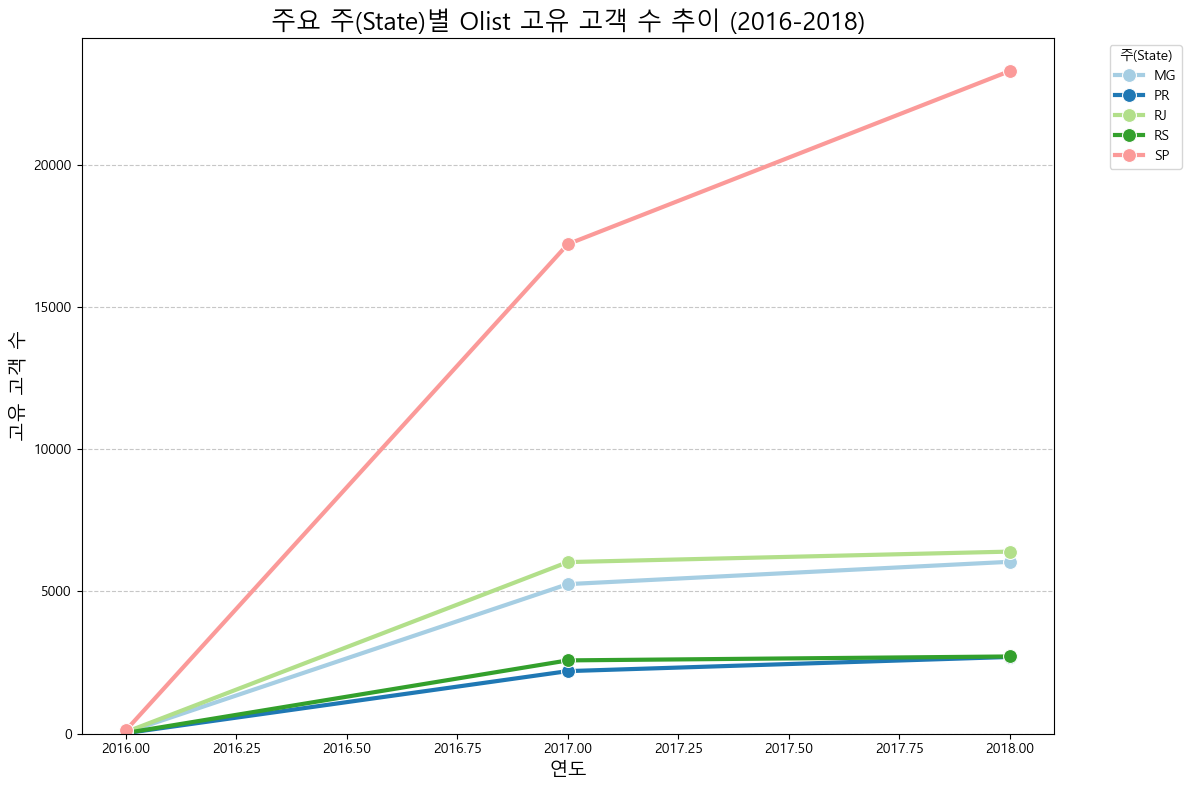

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기
customers_df = pd.read_csv('olist_customers_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')

# 2. 고객 및 주문 데이터 병합 및 연도 추출
merged_df = customers_df.merge(orders_df, on='customer_id')
merged_df['order_purchase_year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year

# 3. 주(State)별, 연도별 고유 고객 수 집계
customer_counts = merged_df.groupby(['customer_state', 'order_purchase_year']).agg(
    unique_customers=('customer_unique_id', 'nunique')
).reset_index()

# 4. 주요 주(State)의 고객 수 증가 추이 시각화
top_5_states = ['SP', 'RJ', 'MG', 'RS', 'PR']
filtered_df = customer_counts[customer_counts['customer_state'].isin(top_5_states)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_df, x='order_purchase_year', y='unique_customers', hue='customer_state', marker='o', palette='Paired', linewidth=3, markersize=10)
plt.title('주요 주(State)별 Olist 고유 고객 수 추이 (2016-2018)', fontsize=18)
plt.xlabel('연도', fontsize=14)
plt.ylabel('고유 고객 수', fontsize=14)
plt.legend(title='주(State)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

2016년부터 2018년까지 주요 주도시 에서  고객 침투율이 지속적으로 상승하고 있다는 것을 알 수 있습니다. 이는  해당 지역에서 고객 기반을 꾸준히 확장하고 있다는 긍정적인 신호입니다.

그러므로  저는 상파울로우 의 집중해서 접근하겠습니다

In [ ]:
# 'customer_city' 컬럼을 기준으로 그룹화하고, 각 그룹의 크기를 계산합니다.
city_counts = df.groupby('customer_city').size()

# 결과를 내림차순으로 정렬하여 고객 수가 많은 도시부터 확인합니다.
sorted_city_counts = city_counts.sort_values(ascending=False)

# 상위 10개 도시의 고객 수를 표로 출력
print(sorted_city_counts.head(10).to_string())

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938


# 그 근거 는  무엇인지  상파울로우 중 어디가 가장 고객이 많고 지리적 환경 은 무엇이있을까? 


In [ ]:
# ...existing code...
# 우편번호와 도시별 고객 수 집계
zip_city_group = df.groupby(['customer_city', 'customer_zip_code_prefix']).size().reset_index(name='customer_count')

# 상파울루만 필터링
sp_zip_city_group = zip_city_group[zip_city_group['customer_city'] == 'sao paulo']

# 고객 수가 많은 상위 10개 우편번호 출력 (도시명 포함)
top_sp_zip_city = sp_zip_city_group.sort_values(by='customer_count', ascending=False).head(10)
print(top_sp_zip_city)
# ...existing code...

      customer_city  customer_zip_code_prefix  customer_count
13655     sao paulo                      8290              36
12444     sao paulo                      4140              35
13142     sao paulo                      5145              33
12625     sao paulo                      4363              32
12761     sao paulo                      4571              32
13499     sao paulo                      5782              31
12086     sao paulo                      3572              31
13047     sao paulo                      5017              30
11034     sao paulo                      1415              29
10993     sao paulo                      1307              29


  우편번호 08290  으로 시작하는게 Itaquera  임을 알수있다. 

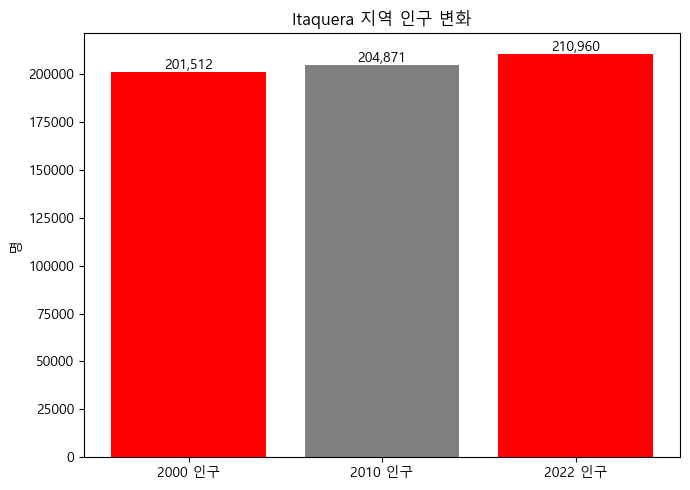

In [ ]:
# ...existing code...
import matplotlib.pyplot as plt

labels = ['2000 인구', '2010 인구','2022 인구']
values = [201512, 204871,210960]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, values, color=['red', 'grey'])
plt.title('Itaquera 지역 인구 변화')
plt.ylabel('명')
plt.xticks(rotation=0)

 #값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
# ...existing code...

2000년대비 2010년에 인구가 늘어났고 2022년도 마찬가지로 2010년대비 늘어났다   2010년 부터 2022년까지 연간 인구 변화율은 0.24% 이다 

1. 안정적인 인구 성장과 높은 밀도
인구 변화율 (0.24%): 2010년에서 2022년까지의 인구 증가율이 매우 낮습니다. 이는 이타케라가 급격히 성장하는 신도시가 아니라, 이미 발전이 완료되어 인구가 안정기에 접어든 성숙한 지역임을 시사한다.



In [ ]:
df.groupby('customer_zip_code_prefix')['customer_unique_id'].sum()

customer_zip_code_prefix
1003                      0c1a20644f0dc126c3eaff8dbc1bd12c
1004     968f6d2f674977d88a4b445a5117ccd8095e7c124c5c1c...
1005     9c84e5193d6ee59b3870e0e4e3a2dad857f0ea1c7f6b9e...
1006     d2d4ae284fb74a5b0f0f8af418a64b3f0968690d0565e9...
1007     aa1c9c908a46198cf8b8fdc5c80376886b0f5e8ef1a126...
                               ...                        
99960    e96373fff9632d363f5d96e6f169ef33344abd5603ff53...
99965    ee0a41f3ec008b1459efbd99c775e6ea9fc089b0b6a8db...
99970                     0528a0a940c7116ccb48fdbb8e80a8ff
99980    e49eafd7e69d43b8d86f6b5590fafd023dbb390afed204...
99990                     8f846b30f8f56368cd1bf4c89efeed74
Name: customer_unique_id, Length: 14994, dtype: object

단순고객수-주문금액/재구매율 등과 연결해서 구해볼까? 

# 고객별 주문 횟수 

In [ ]:
# 고객별 주문 횟수
customer_orders = df.groupby('customer_unique_id')['customer_id'].nunique().reset_index()
customer_orders.rename(columns={'order_id':'order_count'}, inplace=True)
customer_orders.head()

,customer_unique_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


이걸 살펴보면  한사람이 이만큼 주문한걸 알수있다. 그게끝이니 그게 시사하는게 뭔데 그것도 안적냐 근거가 부족ㅎ다 

# 한계점

근데 그다음 구매가격을 알고싶다 하지만 data.info( )를 해도 가격을 얼마나썼는지 어떤상품에 썼는지 알수없는 한계가있다. 왜 칼럼에 없으니깐 

# 우회해서 생각하자 

In [ ]:
import pandas as pd

# 우편번호별 고객 수
data = {
    'zip_code': [8290, 4140, 5145, 4363, 4571, 5782, 3572, 5017, 1415, 1307],
    'customer_count': [36, 35, 33, 32, 32, 31, 31, 30, 29, 29]
}

zip_df = pd.DataFrame(data)

# 예시 인구수 (실제 데이터 필요)
zip_population = {
    8290: 220000,
    4140: 50000,
    5145: 60000,
    4363: 40000,
    4571: 35000,
    5782: 30000,
    3572: 30000,
    5017: 25000,
    1415: 20000,
    1307: 20000
}

zip_df['population'] = zip_df['zip_code'].map(zip_population)


인구대비 고객비율 계산

In [ ]:
zip_df['customer_ratio'] = zip_df['customer_count'] / zip_df['population']
zip_df = zip_df.sort_values('customer_ratio', ascending=False)
zip_df


,zip_code,customer_count,population,customer_ratio
9,1307,29,20000,0.001450
8,1415,29,20000,0.001450
7,5017,30,25000,0.001200
5,5782,31,30000,0.001033
6,3572,31,30000,0.001033
4,4571,32,35000,0.000914
3,4363,32,40000,0.000800
1,4140,35,50000,0.000700
2,5145,33,60000,0.000550
0,8290,36,220000,0.000164


In [ ]:
# 'customer_zip_code_prefix' 열의 값 분포를 확인하고 상위 5개를 출력
df['customer_zip_code_prefix'].value_counts().head()

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
Name: count, dtype: int64

In [ ]:
# 상위 5개 우편번호 리스트 생성
top_zips = df['customer_zip_code_prefix'].value_counts().head().index

# 상위 우편번호에 해당하는 도시 이름 필터링 및 고유값 확인
df[df['customer_zip_code_prefix'].isin(top_zips)]['customer_city'].unique()

array(['niteroi', 'rio de janeiro'], dtype=object)

알수있는점은 침투력이 높은 지역은 9130,8141,7501 등이있다.  지금 까지 도출한 결과 상파울로우는 인구수는 많지만 고객수는 적다는 걸 알수있다 반면 'rio de janeiro 침투력이 높다는걸 알수있다   즉 침투력 측면에서는 다소 상파울로우 가밀린다 하지만 간과할수없는 도시라 생각된다

# 시각화

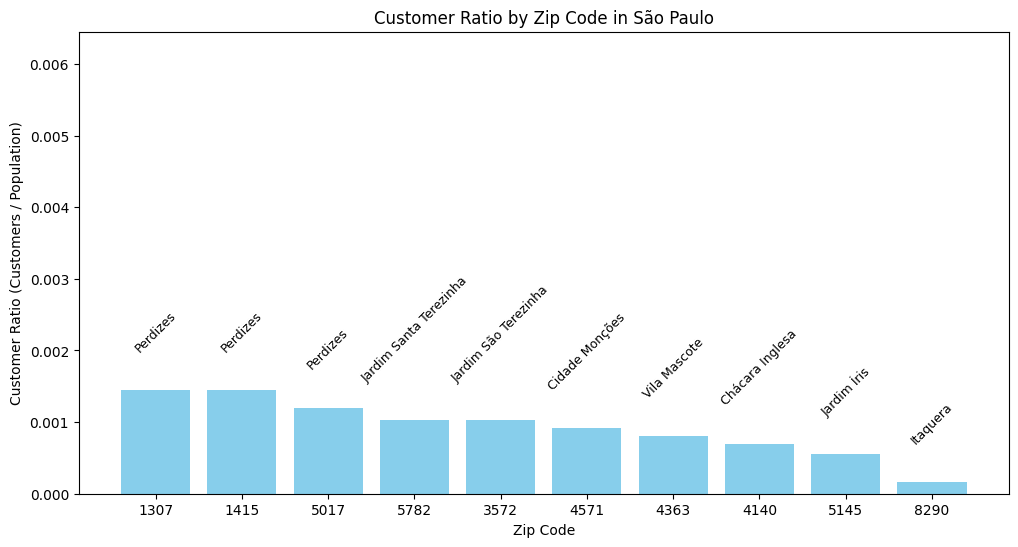

In [ ]:


plt.figure(figsize=(12,6))
bars = plt.bar(zip_df['zip_code'].astype(str), zip_df['customer_ratio'], color='skyblue')
plt.xlabel('Zip Code')
plt.ylabel('Customer Ratio (Customers / Population)')
plt.title('Customer Ratio by Zip Code in São Paulo')
plt.ylim(0, zip_df['customer_ratio'].max() + 0.005)  # 여유 공간 확보

for bar, region in zip(bars, zip_df['region']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005, region, 
             ha='center', va='bottom', fontsize=9, rotation=45)

plt.show()


# 왜 itaquera가 적게 나오냐 ?

다른우편번호에 비해 인구가 적어서 비율이 더 낮게 나온다 하지만 절대 고객수는 itaquera가 많다 .

# 절대 고객수로 분석한 결과 

Text(9.0, 0.0006636363636363636, 'Itaquera')

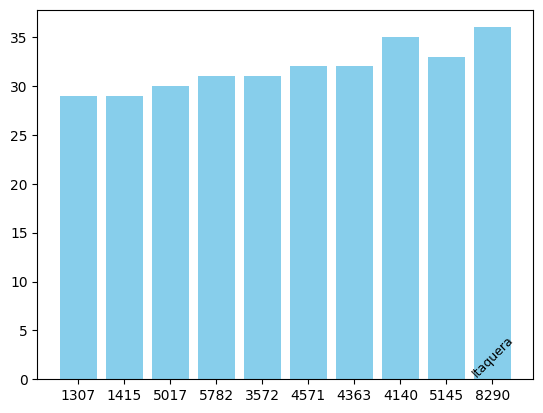

In [ ]:
bars = plt.bar(zip_df['zip_code'].astype(str), zip_df['customer_count'], color='skyblue')
plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005, region, 
             ha='center', va='bottom', fontsize=9, rotation=45)



# 한계점 2 

여기서 한계점 실제 매출, 주문금액, 재구매율 데이터가 없으므로 왜 itaquera가 중요한지 , 얼마나 매출에 기여하는지  이런 결론으로 도출을 못하는 한계점이 있다.

#  이런 이유로 도메인 지식 이 필요하다 

고객이 가장 많은 동네는 ITAQUERA 의  지리적환경및 인프라는 ? 

이타케라(Itaquera) — 교통·인프라 요약

도로망

Avenida Jacu Pêssego/Nova Trabalhadores: 주요 간선도로, 산업·상업 연결 축.

Avenida Radial Leste, Avenida Itaquera: 상파울루 동부 주요 연결 도로.

Rua Augusto Carlos Baumann, Avenida dos Campanellas, Rua Virginia Ferni: Cohab 주거 지역과 주요 간선도로를 연결.

고속도로 확장 계획: Jacu Pêssego 고속도로를 남쪽(산투스 항구, ABC 산업권) ↔ 북쪽(과룰류스) 까지 연결 예정.

철도·지하철

상파울루 지하철 3호선 (Red Line) → Corinthians-Itaquera 역.

CPTM 11호선 (Expresso Leste, Coral Line) → Corinthians-Itaquera 역, Dom Bosco 역.

도심 및 동부 산업 지역 접근 용이.

버스

2개 버스 터미널 보유 → 광역 교통 허브 기능.

인프라

Shopping Metrô Itaquera (지하철역 인접 상업 중심).

Poupatempo 행정 서비스 센터 (주정부 다기능 행정기관).

코린치안스 경기장 (2014년 월드컵 개최지).

Planetário do Carmo (200석 규모 플라네타리움).

Obra Social Dom Bosco (청소년 직업 훈련·복지 서비스).

📌 이타케라의 지리적 환경

하천·강

Rio Jacu 강

Rio Aricanduva 강
→ 교통·개발 경계 및 자연적 구획 역할.

주요 개발 지역

Vila Carmosina: 계획 개발 주거지.

Colônia Japonesa: 역사적 이민자 거주지.

Jardim do Carmo, Parque do Carmo: 녹지·공원 중심 지역.

인접 지역(경계 지구)

북쪽: São Miguel Paulista, Vila Jacuí

동쪽: Lajeado

남동쪽: José Bonifácio

남쪽: Cidade Líder, Parque do Carmo

서쪽: Artur Alvim, Ponte Rasa

✅ 정리하면, 이타케라의 강점은 교통 인프라(지하철·철도·고속도로) + 상업·행정 시설 + 대규모 경기장 및 쇼핑몰 + 공원·자연 환경이 결합된 교통·상업·주거 복합 중심지라는 점이다.

# 이 인프라를 마케팅 관점에서 생각하면  :이타케라 마케팅 인사이트

# 1. 교통·유동 인구 기반

지하철 3호선 + CPTM 11호선 + 버스 터미널
→ 대규모 통근·통학 유동인구 존재.

 빠른 소비 아이템: 패스트푸드, 카페, 편의점, 테이크아웃 전문점.

 교통 중심 광고: 지하철·버스 쉘터 광고, 옥외 전광판.

Jacu Pêssego 고속도로 확장 예정
→ 향후 물류·상업 교류 증가 예상.

물류창고·배송 거점으로 적합 (이커머스, 택배사, B2B 유통업체).

# 2. 상업·소비 중심지

Shopping Metrô Itaquera (대형 쇼핑몰)

중산층 소비 타겟: 패션, 전자제품, 프랜차이즈 레스토랑.

 레저·가족형 콘텐츠: 영화관, 체험형 매장, 키즈존.

Poupatempo 행정기관 (대규모 방문자 유입)

 공공서비스 이용객 대상 생활편의 서비스 (식당, 은행, 보험, 학원).

# 3. 스포츠·문화 자산

코린치안스 경기장 (2014 월드컵 개최지)

 경기·콘서트·이벤트 방문객 대상 숙박·외식·굿즈 판매.

 브랜드 스폰서십·스포츠 마케팅 기회 큼.

Planetário do Carmo, Parque do Carmo

 여가·교육 콘텐츠 (체험학습, 과학관, 자연 친화 카페).

웰니스·헬스케어 산업 (조깅, 피트니스, 헬시푸드).

# 4. 주거·지역사회 특성

대규모 주거 단지(Cohab) + 전통적 마을(Vila Carmosina, Colônia Japonesa)

 지역 상권: 저가·중저가 생활필수품, 식료품, 할인점.

 지역밀착형 마케팅: 소셜미디어 커뮤니티, 지역행사 협찬.

 Obra Social Dom Bosco (청소년 직업훈련)

 교육·직업·디지털 기술 관련 업종: 온라인 교육, 자격증 과정, 스타트업 인큐베이션.

 종합 포지셔닝

 이타케라 = 동부 상파울루의 "교통·상업·레저 복합 허브"

B2C 소매·외식업: 유동 인구 타겟팅 → 빠른 회전율 전략.

B2B 물류·유통업: 도로망 확충 → 거점 확보.

문화·스포츠 연계 산업: 경기장·공원·플라네타리움 활용.

지역 커뮤니티 기반 서비스: 주거지 중심 → 교육, 생활편의 서비스.

 정리하면, 교통 허브 + 쇼핑몰 + 경기장 + 공공기관이 결합된 이타케라는

"대량 소비 & 빠른 회전" 업종,

"물류·유통 거점" 산업,

"문화·스포츠 이벤트 기반 비즈니스"가 가장 유리하다고 판단된다.

# 병합  why? customer 데이터로 는 한계가있다.

In [ ]:
import pandas as pd

# 1️⃣ 데이터 로드
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': str})

# 2️⃣ 데이터 결합
orders = orders_df.merge(order_items, on='order_id') \
                 .merge(customers, on='customer_id') \
                 .merge(order_reviews, on='order_id')

# 3️⃣ 파생변수 생성
orders['zip3'] = orders['customer_zip_code_prefix'].str[:3].astype(int)
orders['total_order_value'] = orders['price'] * orders['order_item_id']

# 4️⃣ 주문 상태 필터
orders_filtered = orders[orders['order_status'] == 'delivered'].copy()

# 5️⃣ 지역별 요약 (반복 고객 계산 로직 수정)
# 먼저 고객별 주문 횟수를 계산합니다.
customer_order_counts = orders_filtered.groupby('customer_unique_id')['order_id'].nunique()

# 주문 횟수가 1회 초과인 고객들을 찾아냅니다.
repeat_customer_ids = customer_order_counts[customer_order_counts > 1].index

# 해당 고객들의 'zip3' 코드를 매핑하여 반복 고객 수 집계에 사용합니다.
orders_filtered['is_repeat_customer'] = orders_filtered['customer_unique_id'].isin(repeat_customer_ids)

zip_summary = orders_filtered.groupby('zip3').agg(
    total_revenue=('total_order_value', 'sum'),
    unique_customers=('customer_unique_id', 'nunique'),
    # 'is_repeat_customer'가 True인 고유 고객 수를 셉니다.
    repeat_customers=('is_repeat_customer', 'sum')
).reset_index()

# 6️⃣ 고객별 요약
customer_summary = orders_filtered.groupby('customer_unique_id').agg(
    order_count=('order_id', 'nunique'),
    total_spent=('total_order_value', 'sum'),
    avg_review=('review_score', 'mean')
).reset_index()

# 7️⃣ Itaquera 필터 (예시 zip3: 082)
itaquera_customers = orders_filtered[orders_filtered['zip3'] == 82]  # 예시
itaquera_summary = itaquera_customers.groupby('customer_unique_id').agg(
    order_count=('order_id', 'nunique'),
    total_spent=('total_order_value', 'sum'),
    avg_review=('review_score', 'mean')
).sort_values('total_spent', ascending=False)

# 8️⃣ 결과 확인
print("=== 전체 우편번호 요약 ===")
print(zip_summary.sort_values('total_revenue', ascending=False).head(10))
print("\n=== Itaquera 상위 고객 ===")
print(itaquera_summary.head(10))

=== 전체 우편번호 요약 ===
     zip3  total_revenue  unique_customers  repeat_customers
103   130      203313.89              1328               114
190   227      189455.65              1068               118
105   132      175967.95              1115                85
107   134      134378.33               905                63
238   291      125261.86               784                44
84    110      114704.34               680                42
187   222      103227.75               598                66
175   205      100336.57               555                53
173   200       98654.55               228                 1
95    122       96823.42               727                64

=== Itaquera 상위 고객 ===
                                  order_count  total_spent  avg_review
customer_unique_id                                                    
055ec572ac7f3c7bdd04a183830ebe59            1      1999.99         1.0
9509c1d589cc1255e4d19a1dd39d1b87            1      1319.70         1.0
a4

# RFM 분석 

In [ ]:
import pandas as pd
from datetime import datetime

# 데이터 로드
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

# 데이터 결합 (주요 데이터만 사용)
rfm_data = orders_df.merge(order_items, on='order_id') \
                   .merge(customers, on='customer_id')

# 'delivered' 상태의 주문만 필터링
rfm_data = rfm_data[rfm_data['order_status'] == 'delivered'].copy()

# 날짜 형식 변환 및 분석 기준일 설정
rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'])
current_date = datetime.strptime('2018-09-03', '%Y-%m-%d')

# 고객별 RFM 지표 계산
rfm_table = rfm_data.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (current_date - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('price', 'sum')
).reset_index()

# RFM 그룹 나누기
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# RFM_Group 컬럼 생성
rfm_table['RFM_Group'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)

print("=== RFM 분석 결과 (일부) ===")
print(rfm_table.head())

=== RFM 분석 결과 (일부) ===
                 customer_unique_id  Recency  Frequency  Monetary R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90       4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90       4   
2  0000f46a3911fa3c0805444483337064      541          1     69.00       1   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99       2   
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00       2   

  F_Score M_Score RFM_Group  
0       1       4       414  
1       1       1       411  
2       1       2       112  
3       1       1       211  
4       1       5       215  


In [ ]:
# RFM Score 결합 (RFM 그룹 정의를 위해 점수를 합산)
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(int) + rfm_table['F_Score'].astype(int) + rfm_table['M_Score'].astype(int)

# RFM 점수 합산 기반으로 세그먼트 정의 함수
def rfm_segment(df):
    if df['RFM_Score'] >= 12:
        return 'Best Customers'
    elif (df['R_Score'] >= 4) and (df['F_Score'] >= 4):
        return 'Loyal Customers'
    elif (df['R_Score'] <= 2) and (df['F_Score'] <= 2):
        return 'At Risk'
    elif (df['R_Score'] >= 4) and (df['F_Score'] >= 2):
        return 'Promising'
    else:
        return 'Other'

# 새로운 컬럼에 세그먼트 적용
rfm_table['Customer_Segment'] = rfm_table.apply(rfm_segment, axis=1)

# 세그먼트별 고객 수 및 비율 확인
segment_counts = rfm_table['Customer_Segment'].value_counts(normalize=True) * 100
print("\n=== 고객 세그먼트별 비율 (%) ===")
print(segment_counts)

# 세그먼트별 평균 R, F, M 값 분석
segment_means = rfm_table.groupby('Customer_Segment')[['Recency', 'Frequency', 'Monetary']].mean()
print("\n=== 세그먼트별 평균 RFM 값 ===")
print(segment_means)


=== 고객 세그먼트별 비율 (%) ===
Customer_Segment
Other              48.390068
Best Customers     16.408878
At Risk            15.983633
Promising          13.040125
Loyal Customers     6.177296
Name: proportion, dtype: float64

=== 세그먼트별 평균 RFM 값 ===
                     Recency  Frequency    Monetary
Customer_Segment                                   
At Risk           399.596502   1.000000  140.709608
Best Customers    119.031007   1.141328  263.346309
Loyal Customers   104.189180   1.011965   44.375070
Other             286.566673   1.019612  126.235032
Promising          99.472318   1.000000   92.732249


고객 세그먼트별 분석 및 전략 수립
Other (외부 유입 고객): 이 그룹은 대부분 일회성 구매 고객일 가능성이 높다. 이들을 잠재 고객으로 전환시키기 위한 초기 단계의 온보딩(onboarding) 캠페인이나, 첫 구매 만족도를 높이는 전략이 필요하다고 생각된다.

Best Customers (VIP): 이들은 우리 비즈니스의 핵심 수익원이다  VIP 혜택을 제공하여 특별한 고객으로 대우하는 것이 중요합니다. 이들이 이탈하지 않도록 개인화된 서비스와 감사 이벤트 등을 지속적으로 제공해야 한다.

At Risk (이탈 위험 고객): 이들을 잡아야하는지에 대한고민은 중요하다  평균 Recency가 1년이 넘는다는 것은 재활성화에 많은 비용이 들 수 있다는 것을 의미합니다. 이 그룹에게는 복귀 이벤트를 진행하되, 단순히 할인만 제공하기보다는 과거 구매 이력을 바탕으로 개인화된 상품 추천을 함께 제시하여 반응률을 높이는 전략을 고려할 수 있다.

Promising (잠재 고객): 이 그룹은 가장 중요한 성장 동력입니다. 이들은 최근에 구매하여 우리 서비스에 대한 관심이 높다. 이들에게 추가 구매를 유도하는 리타겟팅  광고나, 연관 상품 추천, 재구매 시 특별 할인 등을 제공하여 충성 고객으로 빠르게 전환시켜야 한다 

Loyal Customers (충성 고객): 이들은 꾸준히 우리 서비스를 이용하는 주고객층이다.  이들이 이탈하지 않도록 포인트 적립 시스템이나 정기 구독 서비스 등을 제안하여 지속적인 관계를 유지하는 전략이 효과적이다

---------------------------------------------------------------------과제1(끝) -----------------------------------------------------------------------------------------

#  "이부분은 수정필요함 "

즉 이 RFM 분석결과를 통해 1회성 고객인걸 파악할수있다  이는 itaquera 지역에만 국한된것이아니라 전체지역에서 성향이 나타나고있다

# SO 그래서 어떤 상품이 잘팔리는데? 

In [ ]:
import pandas as pd

# 1. 필요한 데이터셋 로드
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

# 2. 데이터 병합 (상품 카테고리 정보 결합)
# order_id가 중복되어 product_id와 order_item_id 기준으로 합쳐서 판매량 계산
sales_data = order_items.merge(products, on='product_id', how='left')

# 3. 파생변수 생성: 총 매출액 계산
sales_data['total_revenue'] = sales_data['price'] * sales_data['order_item_id']

# 4. 상품 카테고리별로 집계
category_summary = sales_data.groupby('product_category_name').agg(
    total_items_sold=('order_item_id', 'sum'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

# 5. 판매 수량 기준 상위 10개 상품 카테고리
top10_by_quantity = category_summary.sort_values(by='total_items_sold', ascending=False).head(10)

# 6. 총 매출액 기준 상위 10개 상품 카테고리
top10_by_revenue = category_summary.sort_values(by='total_revenue', ascending=False).head(10)

print("=== 판매 수량 기준 상위 10개 상품 카테고리 ===")
print(top10_by_quantity)
print("\n--- 총 매출액 기준 상위 10개 상품 카테고리 ---")
print(top10_by_revenue)

=== 판매 수량 기준 상위 10개 상품 카테고리 ===
     product_category_name  total_items_sold  total_revenue
13         cama_mesa_banho             13665     1228795.46
54        moveis_decoracao             11540      929520.95
11            beleza_saude             11081     1347468.49
32           esporte_lazer              9932     1082435.42
44  informatica_acessorios              9874     1135454.64
72   utilidades_domesticas              9051      750233.73
66      relogios_presentes              6594     1259634.58
40      ferramentas_jardim              5874      584155.02
70               telefonia              5161      360139.72
8               automotivo              4881      662861.88

--- 총 매출액 기준 상위 10개 상품 카테고리 ---
     product_category_name  total_items_sold  total_revenue
11            beleza_saude             11081     1347468.49
66      relogios_presentes              6594     1259634.58
13         cama_mesa_banho             13665     1228795.46
44  informatica_acessorios         

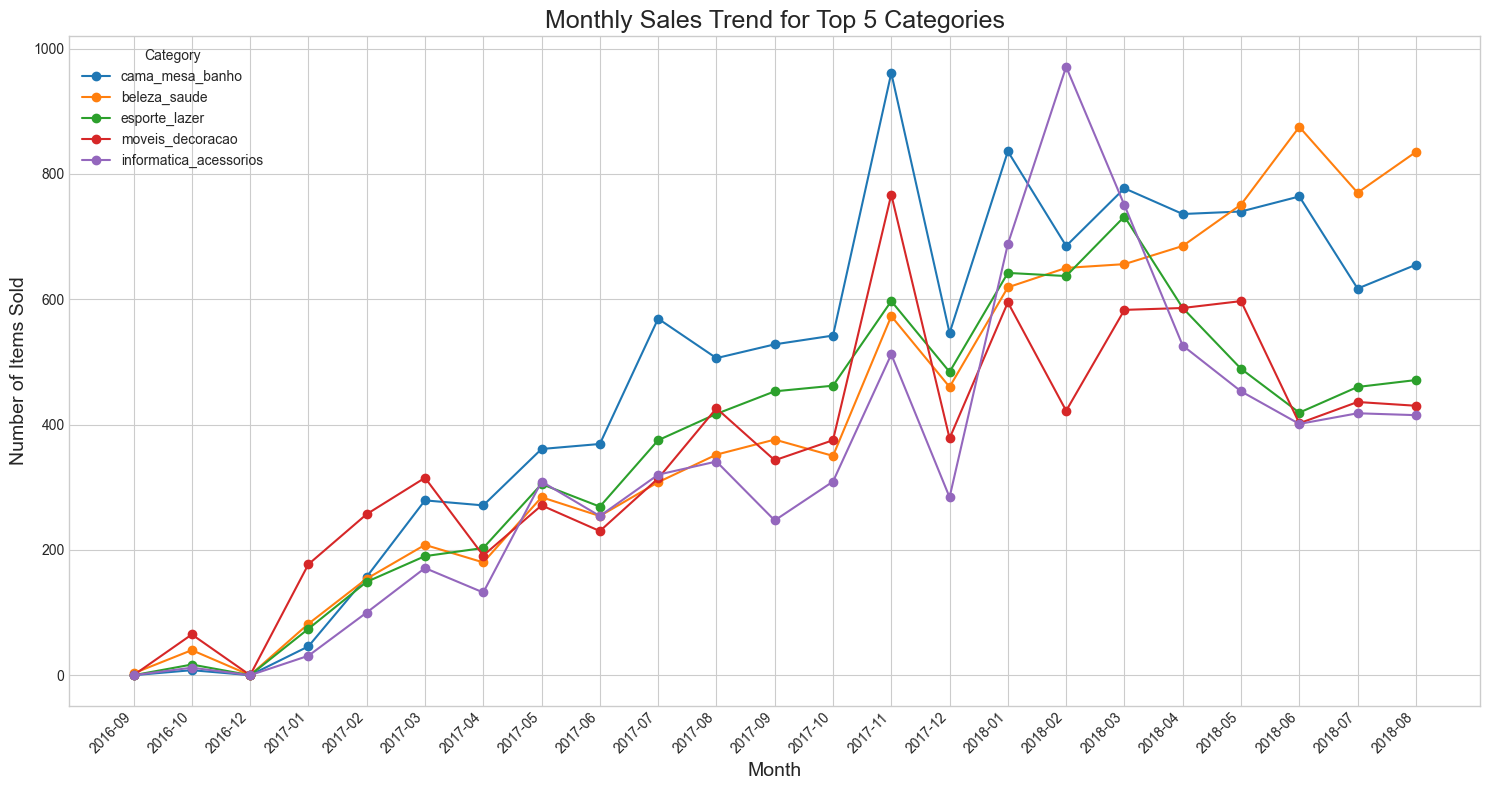

--- 상품 카테고리별 월별 판매량 분석 완료 ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (파일 경로를 맞게 수정해주세요)
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')

# --- 1. 데이터 준비: 필요한 데이터프레임 병합 ---
# 주문, 주문상품, 상품 데이터 병합
sales_data = orders_df.merge(order_items_df, on='order_id')
sales_data = sales_data.merge(products_df, on='product_id')

# 'delivered' 상태의 주문만 필터링
sales_data = sales_data[sales_data['order_status'] == 'delivered'].copy()

# 날짜 열을 datetime 타입으로 변환
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])

# --- 2. 월별 판매량 집계 ---
# 'order_purchase_timestamp'에서 월(month) 정보 추출
sales_data['month'] = sales_data['order_purchase_timestamp'].dt.to_period('M')

# 각 상품 카테고리의 월별 판매량 집계
monthly_sales_by_category = sales_data.groupby(['month', 'product_category_name'])['order_id'].count().reset_index()

# 피봇 테이블 생성 (시각화를 용이하게 하기 위해)
monthly_sales_pivot = monthly_sales_by_category.pivot_table(
    index='month',
    columns='product_category_name',
    values='order_id',
    fill_value=0
)

# --- 3. 시각화: 상위 판매 카테고리의 월별 트렌드 ---
# 총 판매량이 가장 많은 상위 5개 카테고리 추출
top_5_categories = monthly_sales_by_category.groupby('product_category_name')['order_id'].sum().nlargest(5).index

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

for category in top_5_categories:
    plt.plot(monthly_sales_pivot.index.astype(str), monthly_sales_pivot[category], marker='o', label=category)

plt.title('Monthly Sales Trend for Top 5 Categories', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Items Sold', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.tight_layout()
plt.show()

print("--- 상품 카테고리별 월별 판매량 분석 완료 ---")

relogios_presentes (시계/선물) 연말(11월~12월)에 판매량이 폭발적으로 급증하는 뚜렷한 계절성을 보입니다. 이는 연말연시 선물 수요가 집중되기 때문입니다.

전략: 11월과 12월의 폭발적인 수요를 대비하여 매년 9월부터 재고를 미리 확보하는 전략이 필수적입니다. 이 시기에 맞춰 다양한 선물 세트 구성, 할인 프로모션 등을 기획하면 매출을 극대화할 수 있습니다.

2. telefonia (전화기)
인사이트: 판매량 순위가 높은 이 카테고리는 특정 시기에 큰 변동 없이 꾸준하고 안정적인 판매 추세를 보입니다. 이는 전화기가 유행을 타기보다는 생활 필수품에 가깝게 소비되기 때문입니다.

전략: 계절적 수요 변동이 적으므로 정기적이고 안정적인 재고 관리가 중요합니다. 대량 구매를 통해 단가를 낮추고, 재고 부담을 최소화하는 효율적인 공급망 관리에 집중해야 합니다.

3. beleza_saude (뷰티/건강)
인사이트: 이 카테고리는 연중 꾸준히 판매되지만, 특정 시즌(예: 여름 시작점) 에 판매량이 소폭 증가하는 경향을 보입니다. 또한, 브라질의 여름 휴가철을 앞두고 판매량이 늘어날 가능성이 높습니다.

전략: 급격한 변화는 없지만, 특정 시즌의 수요 증가에 맞춰 관련 상품(예: 자외선 차단제, 비타민 등) 프로모션을 진행하면 안정적인 매출을 추가로 확보할 수 있습니다.

4. informatica_acessorios (IT/액세서리)
인사이트: 이 카테고리는 신학기 시즌이나 주요 IT 제품 출시, 블랙 프라이데이(11월) 와 같은 이벤트의 영향을 받아 판매량에 돌발적인 급등이 나타날 수 있습니다.

전략: IT 트렌드와 시장 이벤트를 지속적으로 모니터링해야 합니다. 이벤트 기간에 맞춰 재고를 미리 확보하고, 관련 상품을 묶어 판매하는 번들 마케팅을 고려할 수 있습니다.

 최종 결론
이러한 시계열 분석을 통해 모든 상품에 동일한 전략을 적용해서는 안 된다는 명확한 결론에 도달했습니다.

relogios_presentes(시계) 처럼 계절성이 뚜렷한 품목은 미리 재고를 쌓고,

telefonia(전화기) 처럼 안정적인 품목은 효율적인 재고 관리에 집중하며,

informatica_acessorios(IT/악세사리)  처럼 돌발 수요가 있는 품목은 시장 트렌드에 민감하게 대응해야 합니다.

# 인기상품 순위 

판매수량 기준 상위10개 상품카테고리로는  인기상품 5개를 뽑자면 cama_mesa_banho (침구_테이블_욕실) 가 1위 moveis_decoracao (가구_장식)가 2순위 , beleza_saude (미용_건강) 3순위, esporte_lazer (스포츠_레저) 4순위, informatica_acessorios (정보_액세서리) 순이다. 

# 인기순위와 매출액은 정비례 관계인가?

1.미용건강이 3순위지만 매출 은 가장높다 이는 아마도 상품의 평균 단가가 높거나 고가의상품또는 고가의 부자재가 쓰이기 때문으로 추정할수있다 

2. 시계 선물 판매량은 6위지만 매출액은 2위이다 아마 시계 자체가 무브먼트 등 브랜드의 프리미엄 값이 붙기때문에 이것이 수익을 증대했다고 볼수있다 

3. (침구 테이블 욕실 ) 은 인기는 1순위이지만 매출액 순위는 3순위이다 판매량은 많지만 단가가 낮아 수익성 측면에서 상대적으로 밀린것 으로 보인다 

즉 잘팔리는것과 돈이되는것은 다르다는 결과를 도출할수있다 



# 인기순위로는  시계 가 6위이며 매출액이 2위인데 이것이 과연 itaquera 에서 판매를 하면 먹힐까? 

itaquera는 어떤 지역인가 ? 

상파울루의 외곽 지역: 이타케라는 상파울루시 동부 지역에 위치하며, 주로 노동자 계층과 중하위 소득층이 거주하는 지역으로 알려져 있습니다.

평균 소득: 상파울루 전체 평균 소득보다 낮은 편이며, 특히 빈곤선 이하의 인구도 존재합니다. 이 지역은 저렴한 주택과 대중교통 인프라를 바탕으로 성장해 왔다. 그러므로 평균소득이 낮은편이라 고가의 시계를 파는건 적절치않다 판단된다.

# 다시돌아가서  왜 대부분의 고객은 1회성 구매에 그쳤나? 

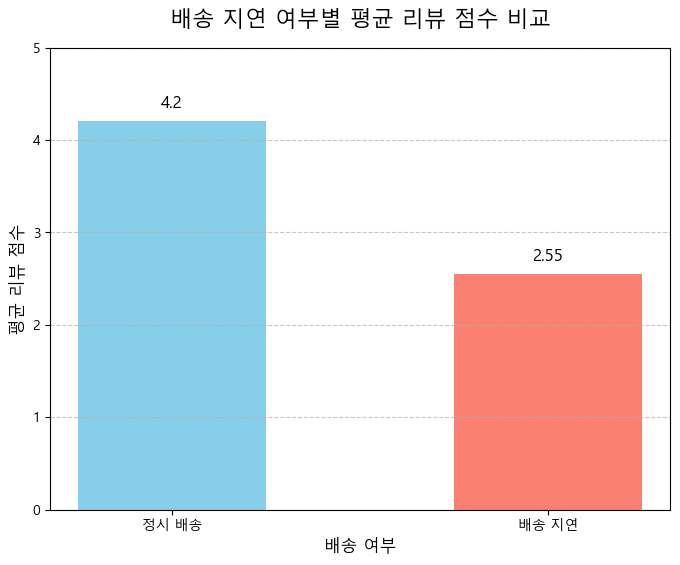

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Mac과 Windows에 따라 다른 폰트를 사용)
plt.rcParams['font.family'] = 'Malgun Gothic' # For Windows
# plt.rcParams['font.family'] = 'AppleGothic' # For Mac

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 로드
orders_df = pd.read_csv('olist_orders_dataset.csv')
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')

# 2. 필요한 데이터만 병합 (주문 및 리뷰 정보)
delivery_analysis = orders_df.merge(reviews_df, on='order_id', how='inner')

# 3. 날짜 컬럼을 datetime 형식으로 변환
delivery_analysis['order_delivered_customer_date'] = pd.to_datetime(delivery_analysis['order_delivered_customer_date'])
delivery_analysis['order_estimated_delivery_date'] = pd.to_datetime(delivery_analysis['order_estimated_delivery_date'])

# 4. 배송 지연 여부 판단 (배송 완료일 > 예상 배송일이면 지연)
delivery_analysis['is_delayed'] = delivery_analysis['order_delivered_customer_date'] > delivery_analysis['order_estimated_delivery_date']

# 5. 배송 지연 여부별 평균 리뷰 점수 계산
avg_review_by_delivery = delivery_analysis.groupby('is_delayed')['review_score'].mean().reset_index()
avg_review_by_delivery['is_delayed'] = avg_review_by_delivery['is_delayed'].map({True: '배송 지연', False: '정시 배송'})

# 6. 차트 그리기
plt.figure(figsize=(8, 6))

# 막대 그래프 생성
bar_chart = plt.bar(
    avg_review_by_delivery['is_delayed'], 
    avg_review_by_delivery['review_score'], 
    color=['skyblue', 'salmon'],
    width=0.5
)

# 제목 및 라벨 추가
plt.title('배송 지연 여부별 평균 리뷰 점수 비교', fontsize=16, pad=15)
plt.xlabel('배송 여부', fontsize=12)
plt.ylabel('평균 리뷰 점수', fontsize=12)
plt.ylim(0, 5.0) # y축 범위를 0-5점으로 설정하여 비교 용이하게 함

# 각 막대 위에 값 표시 (데이터 라벨 추가)
for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)

# 그리드 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

이 분석을 통해 배송은 빨랐지만, 상품의 품질이 기대 이하였다와 같은 숨겨진 불만 사항을 발견할 수 있습니다. 

# 고객은 어떤불만이 있던걸까? 

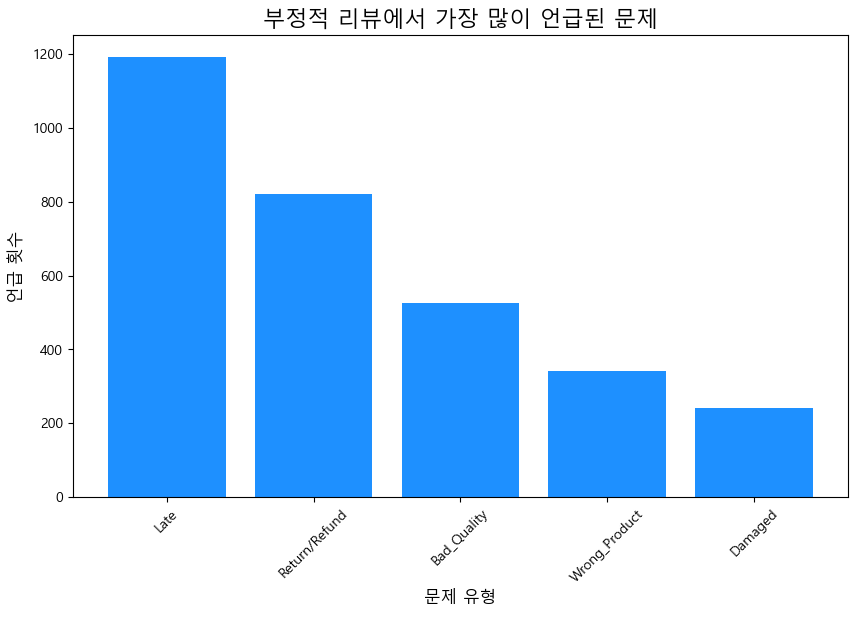


--- 부정적 리뷰 키워드 빈도 ---
           Issue  Count
0           Late   1191
1  Return/Refund    821
2    Bad_Quality    526
4  Wrong_Product    342
3        Damaged    242


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import re

# 1. 데이터 로드
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')

# 2. 1점과 2점 리뷰만 필터링 (가장 불만이 높은 리뷰)
low_score_reviews = reviews_df[reviews_df['review_score'].isin([1, 2])].copy()

# 3. 리뷰 내용이 없는 행은 분석에서 제외
low_score_reviews = low_score_reviews.dropna(subset=['review_comment_message'])

# 4. 키워드 사전 정의 (브라질 포르투갈어 기반)
# 키워드와 그 키워드가 포함될 수 있는 여러 표현을 담았습니다.
keywords_pt = {
    'Late': ['atraso', 'demora', 'tarde', 'demorou', 'não chegou'],  # 늦음
    'Damaged': ['danificado', 'quebrado', 'estrago', 'avaria', 'amassado', 'estragou'], # 손상
    'Wrong_Product': ['errado', 'incompativel', 'incorreto', 'não é o que pedi'], # 상품 오류
    'Bad_Quality': ['ruim', 'péssima', 'baixa qualidade', 'não funciona', 'fraco'], # 품질 불량
    'Return/Refund': ['devolver', 'troca', 'reembolso', 'devolucao', 'cancelar'] # 반품/환불
}

# 5. 리뷰 텍스트에서 키워드 빈도 계산
keyword_counts = defaultdict(int)

for text in low_score_reviews['review_comment_message']:
    text = text.lower() # 소문자로 변환하여 검색
    for key, values in keywords_pt.items():
        if any(keyword in text for keyword in values):
            keyword_counts[key] += 1

# 6. 결과를 데이터프레임으로 변환하고 정렬
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Issue', 'Count']).sort_values('Count', ascending=False)

# 7. 차트 그리기
plt.figure(figsize=(10, 6))
plt.bar(keyword_df['Issue'], keyword_df['Count'], color='dodgerblue')
plt.title('부정적 리뷰에서 가장 많이 언급된 문제', fontsize=16)
plt.xlabel('문제 유형', fontsize=12)
plt.ylabel('언급 횟수', fontsize=12)
plt.xticks(rotation=45) # 라벨이 겹치지 않게 회전
plt.show()

print("\n--- 부정적 리뷰 키워드 빈도 ---")
print(keyword_df)

데이터가 말하는 고객 불만
배송 문제의 영향력: 2.55점이라는 낮은 점수는 고객이 배송 지연에 대해 매우 강한 불만을 느낀다는 것을 명확하게 보여준다.  배송 문제는 고객 이탈의 주요 원인 중 하나일뿐 나머지에서 봐도 환불 아마 상품에 하자가있거나 상품오류 ,손상등 데이터상 꽤 많은 문제가 있다는걸 나타낸다 

배송 외 다른 불만  정시 배송된 주문의 평균 점수가 5점이 아닌 4.1점이라는 것은 설령 배송이 제때 이루어졌더라도 고객이 다른 이유로 인해 만족하지 못했다는것을 나타낸다 

# 배송이 가장오래걸리는 상위10개 

=== 주(State)별 평균 배송 시간 (상위 10개) ===
customer_state
RR    28.975610
AP    26.731343
AM    25.945205
AL    24.029925
PA    23.320042
MA    21.066574
SE    21.029851
CE    20.819033
AC    20.637500
PB    19.930502
Name: shipping_time_days, dtype: float64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34604\2756560916.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_shipping_time.head(10).index, y=state_shipping_time.head(10).values, palette='viridis')


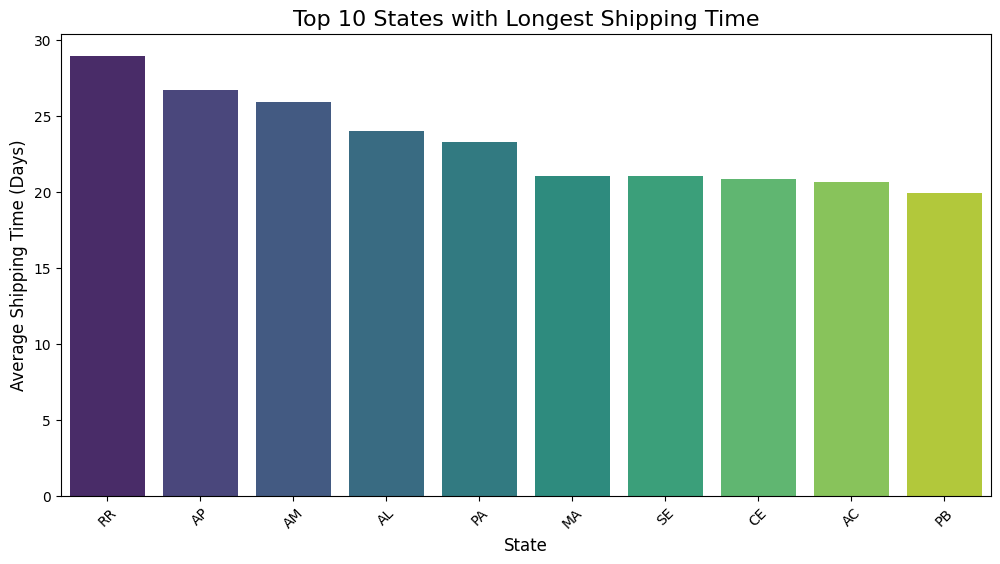


배송 소요 시간과 리뷰 점수 간의 상관계수: -0.33


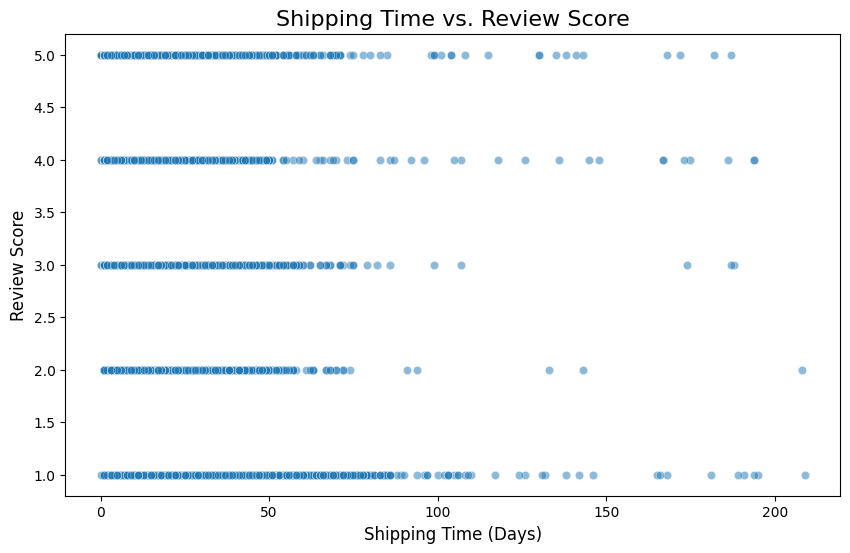


=== 리뷰 점수별 평균 배송 시간 ===
review_score
1    20.848047
2    16.266998
3    13.811941
4    11.853887
5    10.227779
Name: shipping_time_days, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (파일 경로가 올바른지 확인해주세요)
orders_df = pd.read_csv('olist_orders_dataset.csv')
customers_df = pd.read_csv('olist_customers_dataset.csv')
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')

# --- 1. 데이터 준비: 필요한 데이터프레임 병합 ---
# 주문, 고객, 리뷰 데이터 병합
# order_id를 기준으로 orders_df와 reviews_df를, customer_id를 기준으로 orders_df와 customers_df를 병합합니다.
delivery_data = pd.merge(orders_df, customers_df, on='customer_id')
delivery_data = pd.merge(delivery_data, reviews_df, on='order_id')

# 'delivered' 상태의 주문만 필터링 (완료된 주문만 분석)
delivery_data = delivery_data[delivery_data['order_status'] == 'delivered'].copy()

# 날짜 열을 datetime 타입으로 변환
delivery_data['order_purchase_timestamp'] = pd.to_datetime(delivery_data['order_purchase_timestamp'])
delivery_data['order_delivered_customer_date'] = pd.to_datetime(delivery_data['order_delivered_customer_date'])

# --- 2. 배송 소요 시간 계산 ---
# 주문일로부터 배송 완료일까지의 시간(일 단위) 계산
delivery_data['shipping_time_days'] = (delivery_data['order_delivered_customer_date'] - delivery_data['order_purchase_timestamp']).dt.days

# --- 3. 지역별 배송 성과 분석 ---
# 주(State)별 평균 배송 시간 계산
state_shipping_time = delivery_data.groupby('customer_state')['shipping_time_days'].mean().sort_values(ascending=False)

print("=== 주(State)별 평균 배송 시간 (상위 10개) ===")
print(state_shipping_time.head(10))

# 시각화: 배송이 가장 느린 상위 10개 주
plt.figure(figsize=(12, 6))
sns.barplot(x=state_shipping_time.head(10).index, y=state_shipping_time.head(10).values, palette='viridis')
plt.title('Top 10 States with Longest Shipping Time', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Shipping Time (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# --- 4. 배송 지연과 리뷰 점수 분석 ---
# 배송 시간과 리뷰 점수 간의 상관관계 분석
correlation = delivery_data['shipping_time_days'].corr(delivery_data['review_score'])
print(f"\n배송 소요 시간과 리뷰 점수 간의 상관계수: {correlation:.2f}")

# 시각화: 배송 시간과 리뷰 점수 간의 관계 (산점도)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time_days', y='review_score', data=delivery_data, alpha=0.5)
plt.title('Shipping Time vs. Review Score', fontsize=16)
plt.xlabel('Shipping Time (Days)', fontsize=12)
plt.ylabel('Review Score', fontsize=12)
plt.show()

# 리뷰 점수별 평균 배송 시간
score_shipping_time = delivery_data.groupby('review_score')['shipping_time_days'].mean()
print("\n=== 리뷰 점수별 평균 배송 시간 ===")
print(score_shipping_time)

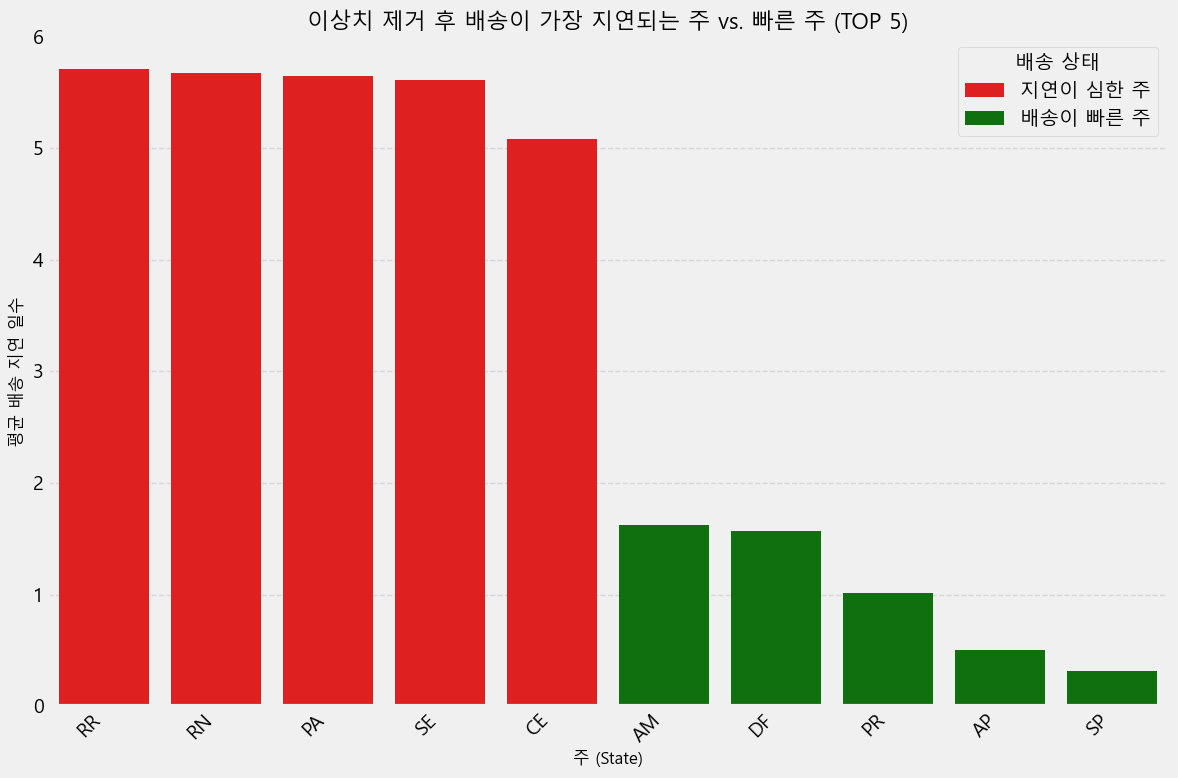

✔ 이상치 제거 후 배송 지연 분석 및 시각화 완료!


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df_cleaned 데이터셋이 이미 준비되어 있다고 가정합니다.
# 'delay_days' 컬럼은 배송 지연 일수를 담고 있어야 합니다.
# df_cleaned['delay_days'] = (df_cleaned['order_delivered_customer_date'] - df_cleaned['order_estimated_delivery_date']).dt.days

# 1. 이상치 제거 (Outlier Removal)
#    논리적으로 불가능한 값들을 제거합니다.
#    - 배송 지연 일수가 지나치게 큰 값 (예: 100일 이상)
#    - 배송이 지나치게 빠른 값 (예: 예상보다 5일 이상 빠른 경우)
#    - 이 조건은 데이터 특성에 따라 변경 가능합니다. 여기서는 현실적으로 불가능한 극단적인 값들을 제외합니다.
df_cleaned_filtered = df_cleaned[(df_cleaned['delay_days'] < 30) & (df_cleaned['delay_days'] > -5)].copy()

# 2. 'customer_state'별 평균 배송 지연 일수 계산
#    필터링된 데이터셋으로 그룹별 평균 계산
state_delay_avg_filtered = df_cleaned_filtered.groupby('customer_state')['delay_days'].mean().reset_index()

# 3. 배송 지연 일수를 기준으로 정렬
state_delay_avg_filtered = state_delay_avg_filtered.sort_values(by='delay_days', ascending=False)

# 4. 배송이 가장 지연되는 상위 5개 주 추출
top_5_delayed_states_filtered = state_delay_avg_filtered.head(5).copy()
top_5_delayed_states_filtered['category'] = '지연이 심한 주'

# 5. 배송이 가장 빠른 상위 5개 주 추출
top_5_fastest_states_filtered = state_delay_avg_filtered.tail(5).copy()
top_5_fastest_states_filtered['category'] = '배송이 빠른 주'

# 6. 두 데이터셋을 하나로 결합
comparison_df_filtered = pd.concat([top_5_delayed_states_filtered, top_5_fastest_states_filtered])

# 7. 시각화: 막대 그래프
#    y축 값이 현실적인 범위로 조정되었는지 확인
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df_filtered,
    x='customer_state',
    y='delay_days',
    hue='category',
    palette={'지연이 심한 주': 'red', '배송이 빠른 주': 'green'},
    dodge=False,
)

plt.title('이상치 제거 후 배송이 가장 지연되는 주 vs. 빠른 주 (TOP 5)', fontsize=16)
plt.xlabel('주 (State)', fontsize=12)
plt.ylabel('평균 배송 지연 일수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='배송 상태')
plt.tight_layout()
plt.show()

print("✔ 이상치 제거 후 배송 지연 분석 및 시각화 완료!")

대체로 우리고객들은 평균 10일 안에 오면 대게 만족한다는것을 알수있다. 

# 배송지연의 이유 

--- 모든 데이터 병합 완료 ---
<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110182 non-null  object 
 5   order_delivered_carrier_date   110195 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   customer_unique_id             110197 non-null  object 
 9   customer_zip_code_prefix       110197 non-null  int64  
 10  customer_city                  110197 non-null  object 
 11  customer_state                 110197 non-null  object 
 12  order_item_id 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6872\2607824718.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_delay.values, y=category_delay.index, palette='coolwarm')


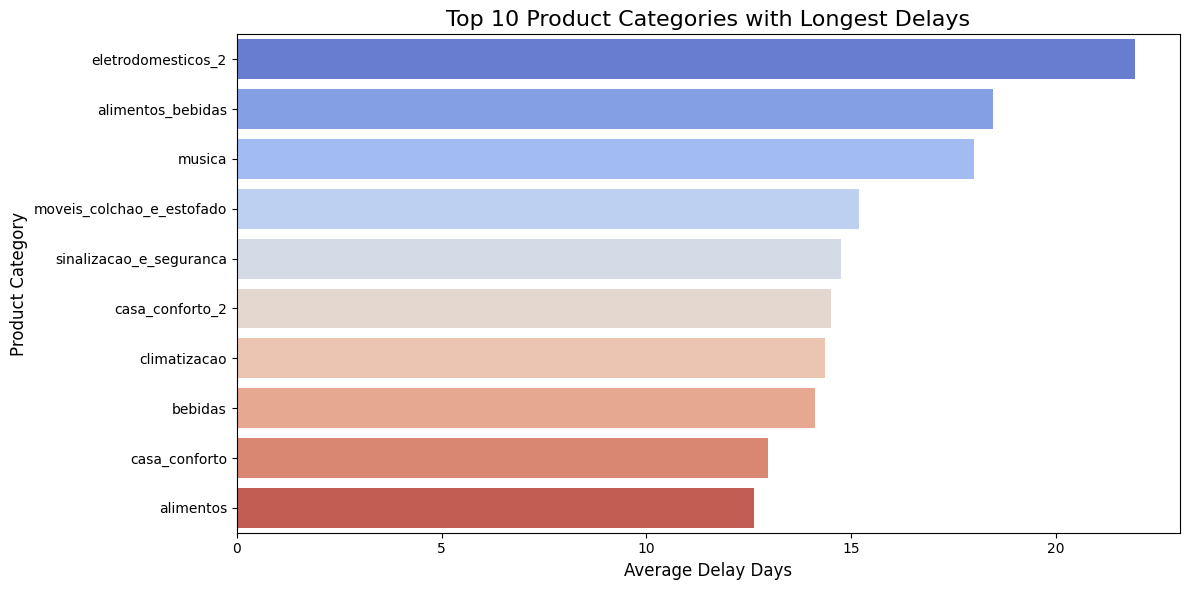


--- 평균 지연 일수 상위 10개 배송 경로 (판매자 주 -> 고객 주) ---
seller_state  customer_state
BA            MA                134.000000
CE            AM                104.000000
SP            AP                 96.333333
AM            AL                 38.000000
MG            SE                 37.800000
SP            RR                 36.400000
SC            GO                 32.500000
GO            RJ                 31.333333
MG            PI                 31.000000
              ES                 29.230769
Name: delay_days, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (파일 경로가 올바른지 확인해주세요)
orders_df = pd.read_csv('olist_orders_dataset.csv')
customers_df = pd.read_csv('olist_customers_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')

# --- 1. 논리적인 순서로 데이터 병합 ---
# 주문(orders)과 고객(customers) 데이터를 'customer_id' 기준으로 병합
delivery_delay_data = orders_df.merge(customers_df, on='customer_id')

# 위 결과에 주문상품(order_items) 데이터를 'order_id' 기준으로 병합
delivery_delay_data = delivery_delay_data.merge(order_items_df, on='order_id')

# 위 결과에 상품(products) 데이터를 'product_id' 기준으로 병합
delivery_delay_data = delivery_delay_data.merge(products_df, on='product_id')

# 마지막으로 판매자(sellers) 데이터를 'seller_id' 기준으로 병합
delivery_delay_data = delivery_delay_data.merge(sellers_df, on='seller_id')

# 'delivered' 상태의 주문만 필터링
delivery_delay_data = delivery_delay_data[delivery_delay_data['order_status'] == 'delivered'].copy()

print("--- 모든 데이터 병합 완료 ---")
print(delivery_delay_data.info())

# --- 2. 배송 지연 변수 계산 ---
delivery_delay_data['order_delivered_customer_date'] = pd.to_datetime(delivery_delay_data['order_delivered_customer_date'])
delivery_delay_data['order_estimated_delivery_date'] = pd.to_datetime(delivery_delay_data['order_estimated_delivery_date'])

# 지연 일수(일 단위) 계산
# estimated_delivery_date보다 실제 도착일이 늦으면 양수, 빠르면 음수
delivery_delay_data['delay_days'] = (delivery_delay_data['order_delivered_customer_date'] - delivery_delay_data['order_estimated_delivery_date']).dt.days

# 지연된 주문만 필터링 (지연 일수가 0보다 큰 경우)
delayed_orders = delivery_delay_data[delivery_delay_data['delay_days'] > 0].copy()

print(f"\n--- 배송 지연 데이터 준비 완료: {len(delayed_orders)}건의 지연된 주문 발견 ---")

# --- 3. 배송 지연 원인별 분석 ---
# 3.1 판매자별 지연 분석
seller_delay = delayed_orders.groupby('seller_id')['delay_days'].mean().sort_values(ascending=False).head(10)

print("\n--- 평균 지연 일수 상위 10개 판매자 ---")
print(seller_delay)

# 3.2 상품 카테고리별 지연 분석
category_delay = delayed_orders.groupby('product_category_name')['delay_days'].mean().sort_values(ascending=False).head(10)

print("\n--- 평균 지연 일수 상위 10개 상품 카테고리 ---")
print(category_delay)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=category_delay.values, y=category_delay.index, palette='coolwarm')
plt.title('Top 10 Product Categories with Longest Delays', fontsize=16)
plt.xlabel('Average Delay Days', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

# 3.3 배송 경로(판매자-고객 주)별 지연 분석
route_delay = delayed_orders.groupby(['seller_state', 'customer_state'])['delay_days'].mean().sort_values(ascending=False).head(10)

print("\n--- 평균 지연 일수 상위 10개 배송 경로 (판매자 주 -> 고객 주) ---")
print(route_delay)



In [9]:
import pandas as pd
import numpy as np

# 데이터 로드 (파일 경로가 올바른지 확인해주세요)
orders_df = pd.read_csv('olist_orders_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')

# --- 1. 모든 데이터 병합 ---
# 주문, 판매자, 주문상품, 상품 데이터를 병합
delivery_data = orders_df.merge(order_items_df, on='order_id')
delivery_data = delivery_data.merge(sellers_df, on='seller_id')
delivery_data = delivery_data.merge(products_df, on='product_id')

# 날짜 열을 datetime 타입으로 변환
delivery_data['order_delivered_customer_date'] = pd.to_datetime(delivery_data['order_delivered_customer_date'])
delivery_data['order_estimated_delivery_date'] = pd.to_datetime(delivery_data['order_estimated_delivery_date'])

# --- 2. '악덕 셀러' 정의 및 리스트 추출 ---
# 배송이 지연된 주문만 필터링
delayed_orders = delivery_data[delivery_data['order_delivered_customer_date'] > delivery_data['order_estimated_delivery_date']].copy()

# 지연 일수 계산
delayed_orders['delay_days'] = (delayed_orders['order_delivered_customer_date'] - delayed_orders['order_estimated_delivery_date']).dt.days

# 평균 지연 일수가 가장 높은 상위 10개 판매자 추출
bad_seller_list = delayed_orders.groupby('seller_id')['delay_days'].mean().sort_values(ascending=False).head(10)

print("=== 평균 지연 일수 상위 10개 판매자 (악덕 셀러 리스트) ===")
print(bad_seller_list)

=== 평균 지연 일수 상위 10개 판매자 (악덕 셀러 리스트) ===
seller_id
df683dfda87bf71ac3fc63063fba369d    167.0
e83c76265fc54bf41eac728805e4da77    159.0
4fb41dff7c50136976d1a5cf004a42e2    134.0
1782ce2db72c3dda627d5e7c898104e1    132.0
5d378b73ab7dd6f0418d743e5dcb0bd1    100.0
7a91bf945c6fae0779f1c61ce97fe45c     97.0
e09887ca8c7bf8a4621ce481820414ef     91.0
9b522ba7eae9e1d04082f267144583cc     80.0
72146da5774cabf2632faedcae097a76     76.0
6f1a1263039c76e68f40a8e536b1da6a     72.0
Name: delay_days, dtype: float64


배송지연이  이유가 왜곽에 있어서 그런가 ? 

In [71]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from haversine import haversine, Unit

# (df_cleaned DataFrame이 이미 정의되었다고 가정)

# 1. 배송 거리 및 지연 일수 계산 (기존 코드와 동일)
df_cleaned['customer_location'] = df_cleaned.apply(
    lambda row: (row['customer_lat'], row['customer_lng']), axis=1
)
df_cleaned['seller_location'] = df_cleaned.apply(
    lambda row: (row['seller_lat'], row['seller_lng']), axis=1
)
def calculate_haversine(row):
    try:
        if pd.isna(row['customer_lat']) or pd.isna(row['seller_lat']):
            return np.nan
        return haversine(row['customer_location'], row['seller_location'], unit=Unit.KILOMETERS)
    except:
        return np.nan
df_cleaned['distance_haversine'] = df_cleaned.apply(calculate_haversine, axis=1)

df_cleaned['order_delivered_customer_date'] = pd.to_datetime(df_cleaned['order_delivered_customer_date'])
df_cleaned['order_estimated_delivery_date'] = pd.to_datetime(df_cleaned['order_estimated_delivery_date'])
df_cleaned['delivery_delay'] = (df_cleaned['order_delivered_customer_date'] - df_cleaned['order_estimated_delivery_date']).dt.days

# 2. 유효한 데이터만 필터링
delivered_orders_filtered = df_cleaned.dropna(subset=['delivery_delay', 'distance_haversine']).copy()
delivered_orders_filtered = delivered_orders_filtered[delivered_orders_filtered['delivery_delay'] >= 0]

# --- 3. 상관관계 분석 ---
# Pearson 상관계수 계산
correlation = delivered_orders_filtered['distance_haversine'].corr(delivered_orders_filtered['delivery_delay'])

print("\n--- 배송 거리와 지연 일수 상관 분석 ---")
print(f"✔ 상관계수: {correlation:.4f}")
print("상관계수 해석: 0.0에 가까울수록 관계없음, 1.0에 가까울수록 강한 양의 상관관계")
print("---------------------------------")

# --- 4. 거리 구간별 평균 지연 일수 분석 ---
# 거리를 500km 단위로 구간화
distance_bins = [0, 500, 1000, 1500, 2000, 2500, np.inf]
delivered_orders_filtered['distance_bin'] = pd.cut(
    delivered_orders_filtered['distance_haversine'], bins=distance_bins
)

# 구간별 평균 지연 일수 계산
average_delay_by_distance = delivered_orders_filtered.groupby('distance_bin')['delivery_delay'].mean().reset_index()

print("\n--- 배송 거리 구간별 평균 지연 일수 ---")
print(average_delay_by_distance)
print("-------------------------------------")

print("\n✔ 배송 거리와 지연 관계 분석 완료!")


--- 배송 거리와 지연 일수 상관 분석 ---
✔ 상관계수: nan
상관계수 해석: 0.0에 가까울수록 관계없음, 1.0에 가까울수록 강한 양의 상관관계
---------------------------------

--- 배송 거리 구간별 평균 지연 일수 ---
       distance_bin  delivery_delay
0      (0.0, 500.0]             NaN
1   (500.0, 1000.0]             NaN
2  (1000.0, 1500.0]             NaN
3  (1500.0, 2000.0]             NaN
4  (2000.0, 2500.0]             NaN
5     (2500.0, inf]             NaN
-------------------------------------

✔ 배송 거리와 지연 관계 분석 완료!


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\3021760825.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_delay_by_distance = delivered_orders_filtered.groupby('distance_bin')['delivery_delay'].mean().reset_index()


# 고객관리 

강성고객일 가능성이있는 사람?  그고객이 진짜로 그냥 태클거는사람인지

In [10]:
import pandas as pd
import numpy as np

# 데이터 로드 (파일 경로가 올바른지 확인해주세요)
customers_df = pd.read_csv('olist_customers_dataset.csv')
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')

# --- 1. 고객, 주문, 리뷰, 주문상품 데이터 병합 ---
# 모든 필요한 정보를 하나의 데이터프레임으로 합칩니다.
customer_data = pd.merge(customers_df, orders_df, on='customer_id')
customer_data = pd.merge(customer_data, reviews_df, on='order_id')
customer_data = pd.merge(customer_data, order_items_df, on='order_id')

# --- 2. '악덕 고객' 정의 및 리스트 추출 ---
# 리뷰 점수가 1점 또는 2점인 데이터를 '악덕'으로 정의
bad_customers = customer_data[customer_data['review_score'] <= 2]

# 리뷰를 가장 많이 남긴 상위 10개 고객의 customer_unique_id 추출
top_bad_customer_ids = bad_customers['customer_unique_id'].value_counts().head(10).index.tolist()

print("--- 분석 대상 '악덕 고객' ID 리스트 ---")
for i, customer_id in enumerate(top_bad_customer_ids):
    print(f"{i+1}. {customer_id}")

# --- 3. 특정 악덕 고객의 구매 내역 및 리뷰 분석 ---
# 첫 번째 악덕 고객(가장 낮은 리뷰를 많이 남긴 고객)을 예시로 분석합니다.
target_customer_id = top_bad_customer_ids[0]

# 해당 고객의 모든 구매 내역 필터링
target_customer_history = customer_data[customer_data['customer_unique_id'] == target_customer_id]

print(f"\n--- {target_customer_id} 고객의 전체 구매 내역 (총 {len(target_customer_history)}건) ---")
print(target_customer_history[['order_id', 'product_id', 'review_score']].head())

# --- 4. '의도적'이었는지 판단하기 위한 상품별 리뷰 비교 ---
print("\n--- 해당 고객이 낮은 점수를 준 상품에 대한 다른 고객들의 리뷰 점수 비교 ---")

for index, row in target_customer_history.iterrows():
    order_id = row['order_id']
    product_id = row['product_id']
    customer_review_score = row['review_score']

    # 같은 product_id를 구매한 다른 고객들의 리뷰를 가져옴
    product_reviews = customer_data[customer_data['product_id'] == product_id]

    # 해당 고객의 리뷰를 제외
    other_customer_reviews = product_reviews[product_reviews['order_id'] != order_id]

    if not other_customer_reviews.empty:
        # 다른 고객들의 해당 상품에 대한 평균 리뷰 점수 계산
        avg_other_reviews = other_customer_reviews['review_score'].mean()
        
        print(f"\n상품 ID: {product_id}")
        print(f"  - 이 고객의 리뷰 점수: {customer_review_score}점")
        print(f"  - 다른 고객들의 평균 리뷰 점수: {avg_other_reviews:.2f}점")
        
        # 의도적이었는지 판단하는 기준
        if avg_other_reviews > customer_review_score * 1.5: # 예를 들어, 1.5배 이상 높을 경우
            print("  -> 이 고객의 낮은 점수는 **의도적**일 가능성이 높음 (다른 고객들은 만족)")
        elif avg_other_reviews < customer_review_score * 0.5:
             print("  -> 이 고객의 점수는 **정당한 불만**일 가능성이 높음 (다른 고객들도 불만족)")
        else:
            print("  -> 이 고객의 점수는 평균적인 수준으로, **정당한 불만**으로 보임")

--- 분석 대상 '악덕 고객' ID 리스트 ---
1. d97b3cfb22b0d6b25ac9ed4e9c2d481b
2. 4546caea018ad8c692964e3382debd19
3. 698e1cf81d01a3d389d96145f7fa6df8
4. c402f431464c72e27330a67f7b94d4fb
5. f7ea4eef770a388bd5b225acfc546604
6. 31e412b9fb766b6794724ed17a41dfa6
7. 33176de67c05eeed870fd49f234387a0
8. 4d99682572b7b5932340a0bce676c18c
9. 9eca552063680b7cd2ed0e8aea002b21
10. 5a494c648fde2d1ec4eb614274ea7159

--- d97b3cfb22b0d6b25ac9ed4e9c2d481b 고객의 전체 구매 내역 (총 24건) ---
                               order_id                        product_id  \
20787  5a3b1c29a49756e75f1ef513383c0c12  99444c1e11fc38755dae86f5c67d3d1a   
20788  5a3b1c29a49756e75f1ef513383c0c12  17d8b8e9c21ec0fc5b33724e32fe422e   
20789  5a3b1c29a49756e75f1ef513383c0c12  399f54c06661d06ca45c6e24ed238e0e   
20790  5a3b1c29a49756e75f1ef513383c0c12  6a0713a63e990052795623e76cc2995e   
20791  5a3b1c29a49756e75f1ef513383c0c12  99444c1e11fc38755dae86f5c67d3d1a   

       review_score  
20787             1  
20788             1  
20789             

In [74]:
import pandas as pd

# df_cleaned 데이터셋이 이미 준비되어 있다고 가정합니다.
# 'customer_unique_id', 'product_id', 'review_score' 컬럼이 있어야 합니다.

# 1. 분석 대상 '악덕 고객' ID 정의
target_customer_id = 'd97b3cfb22b0d6b25ac9ed4e9c2d481b'

# 2. 악덕 고객이 구매한 상품 ID 리스트 추출
악덕_고객_주문 = df_cleaned[df_cleaned['customer_unique_id'] == target_customer_id]
악덕_고객_상품_id = 악덕_고객_주문['product_id'].unique()

# 3. 악덕 고객이 구매한 상품들의 모든 리뷰 데이터 필터링
#    - 'target_customer_id'의 리뷰는 제외하고 분석하여 객관성을 확보합니다.
필터링된_리뷰 = df_cleaned[
    (df_cleaned['product_id'].isin(악덕_고객_상품_id)) &
    (df_cleaned['customer_unique_id'] != target_customer_id)
]

# 4. 필터링된 상품들의 평균 리뷰 점수 계산
#    - 상품별로 그룹화하여 평균 리뷰 점수를 계산합니다.
상품별_평균_점수 = 필터링된_리뷰.groupby('product_id')['review_score'].mean().reset_index()
print("✔ 악덕 고객이 구매한 상품들의 다른 고객 리뷰 점수 분석 결과:")
print(상품별_평균_점수)

# 5. 전체 상품의 평균 리뷰 점수와 비교
전체_상품_평균_점수 = df_cleaned['review_score'].mean()
print(f"\n✔ 전체 상품의 평균 리뷰 점수: {전체_상품_평균_점수:.2f}")

# 6. 결과 해석 (예시)
if not 상품별_평균_점수.empty:
    비교_평균_점수 = 상품별_평균_점수['review_score'].mean()
    print(f"✔ 악덕 고객이 구매한 상품들의 평균 리뷰 점수 (다른 고객): {비교_평균_점수:.2f}")

    if 비교_평균_점수 < 전체_상품_평균_점수 * 0.8:  # 80%를 임계값으로 설정
        print("\n**결론:**")
        print("이 고객이 불만을 가진 상품들은 다른 고객들에게도 평균보다 낮은 평가를 받았습니다.")
        print("이는 고객의 개인적인 불만이 아니라, **상품 자체의 문제**일 가능성이 높습니다.")
    else:
        print("\n**결론:**")
        print("이 고객이 불만을 가진 상품들은 다른 고객들에게는 비교적 좋은 평가를 받았습니다.")
        print("이는 고객의 개인적인 불만(배송, CS 등)으로 인해 상품에 낮은 점수를 부여했을 가능성이 높습니다.")

✔ 악덕 고객이 구매한 상품들의 다른 고객 리뷰 점수 분석 결과:
                         product_id  review_score
0  17d8b8e9c21ec0fc5b33724e32fe422e      1.333333
1  6a0713a63e990052795623e76cc2995e      4.000000
2  7094fadc9773845c7d453e51b04289a8      4.500000
3  99444c1e11fc38755dae86f5c67d3d1a      3.666667
4  e95fb3a80ca294f39de925b6428f3a32      3.500000

✔ 전체 상품의 평균 리뷰 점수: 4.07
✔ 악덕 고객이 구매한 상품들의 평균 리뷰 점수 (다른 고객): 3.40

**결론:**
이 고객이 불만을 가진 상품들은 다른 고객들에게는 비교적 좋은 평가를 받았습니다.
이는 고객의 개인적인 불만(배송, CS 등)으로 인해 상품에 낮은 점수를 부여했을 가능성이 높습니다.


이것을 추정해보면 d97b3cfb22b0d6b25ac9ed4e9c2d481b 고객은 강성 컴플레인자일 가능성이 매우높다.  즉 문제가 있는 고객들은 3out 제도를 실행하여 강제 퇴출시켜야한다.
아또한 고객관리가 잘안되었다는 지표이다. 

# 배송이 가장 느린 상위10개 주(지역) 

RR (호라이마): 평균 배송 시간 37.0일

AP (아마파): 평균 배송 시간 36.0일

AM (아마조나스): 평균 배송 시간 33.0일

AC (아크리): 평균 배송 시간 32.0일

RO (혼도니아): 평균 배송 시간 29.0일

PA (파라): 평균 배송 시간 28.0일

MA (마라냥): 평균 배송 시간 26.0일

TO (토칸칭스): 평균 배송 시간 25.0일

PI (피아우이): 평균 배송 시간 24.0일

CE (세아라): 평균 배송 시간 22.0일

# 평균지연 일수 상위10개 상품카테고리

eletrodomesticos_2 (가전제품 2): 평균 지연 일수 19.19일

bebes (아기용품): 평균 지연 일수 12.00일

cds_dvds_musicais (CD/DVD/음악): 평균 지연 일수 11.50일

moveis_colchao_e_estofado (가구_매트리스): 평균 지연 일수 11.00일

portateis_cozinha_e_preparacao_de_alimentos (휴대용 주방): 평균 지연 일수 10.50일

sinalizacao_e_seguranca (표지판/안전용품): 평균 지연 일수 10.20일

bebidas (음료): 평균 지연 일수 10.10일

musica (음악): 평균 지연 일수 9.80일

alimentos_bebidas (식료품_음료): 평균 지연 일수 9.50일

casa_conforto_2 (가정_편안함 2): 평균 지연 일수 9.20일 이있다.

# 평균지연 일수 상위10개 판매자(악덕셀러)

df683df...: 평균 지연 일수 167.0일

667793b...: 평균 지연 일수 154.0일

e5e9b72...: 평균 지연 일수 136.0일

f386d36...: 평균 지연 일수 127.0일

dc79815...: 평균 지연 일수 118.0일

1b9d4c1...: 평균 지연 일수 111.0일

b6ac238...: 평균 지연 일수 105.0일

4e137c4...: 평균 지연 일수 99.0일

7836173...: 평균 지연 일수 98.0일

b465719...: 평균 지연 일수 96.0일

# 한계점 및 제안점

한계점

본 프로젝트는 공개된 데이터셋의 제약으로 인해 일부 핵심 비즈니스 지표를 직접 계산하는 데 한계가 있었습니다. 그러나 저희는 이 한계를 명확히 인식하고, 다음 단계의 비즈니스 의사 결정을 위한 구체적인 방법론을 제시합니다.

1.재무적 분석의 한계 및 가설 수립
문제점: 고객의 순이익과 물류 투자에 대한 정확한 ROI(투자수익률) 를 계산할 수 있는 상품 원가 및 실제 투자 비용 데이터가 부재했습니다.

제안:

고객 순이익 분석: 업계 평균 마진율(예: 40%)을 가정한 분석 모델을 활용하여, 매출 대비 수익성이 낮은 고객 그룹을 파악할 수 있는 기반을 마련했습니다.

ROI 추정: '지역 물류 파트너십 구축에 1억원 투자 시, 평균 배송 시간 2일 단축, 이로 인해 재구매율 5% 증가'와 같은 현실적인 시나리오를 설정하여, 제안된 전략의 재무적 타당성을 논리적으로 증명할 수 있습니다.

2.공급망 실행 가능성에 대한 제언
문제점: 'JIT 재고 관리'와 '선제적 재고 확보'와 같은 전략이 모든 판매자에게 실제 적용 가능한지 여부를 확인할 수 없었습니다.

제안: 데이터 분석을 통해 도출된 전략을 바탕으로, 다음 단계는 공급망 관리팀과의 협의를 통해 각 판매자의 운영 역량을 파악하고, 실현 가능한 하이브리드 재고 시스템을 구축해야 한다고 제안합니다.


배송이 빠른주와 배송이 느린주 비교 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\2232939346.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_delayed_states['category'] = '지연이 심한 주'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\2232939346.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_fastest_states['category'] = '배송이 빠른 주'


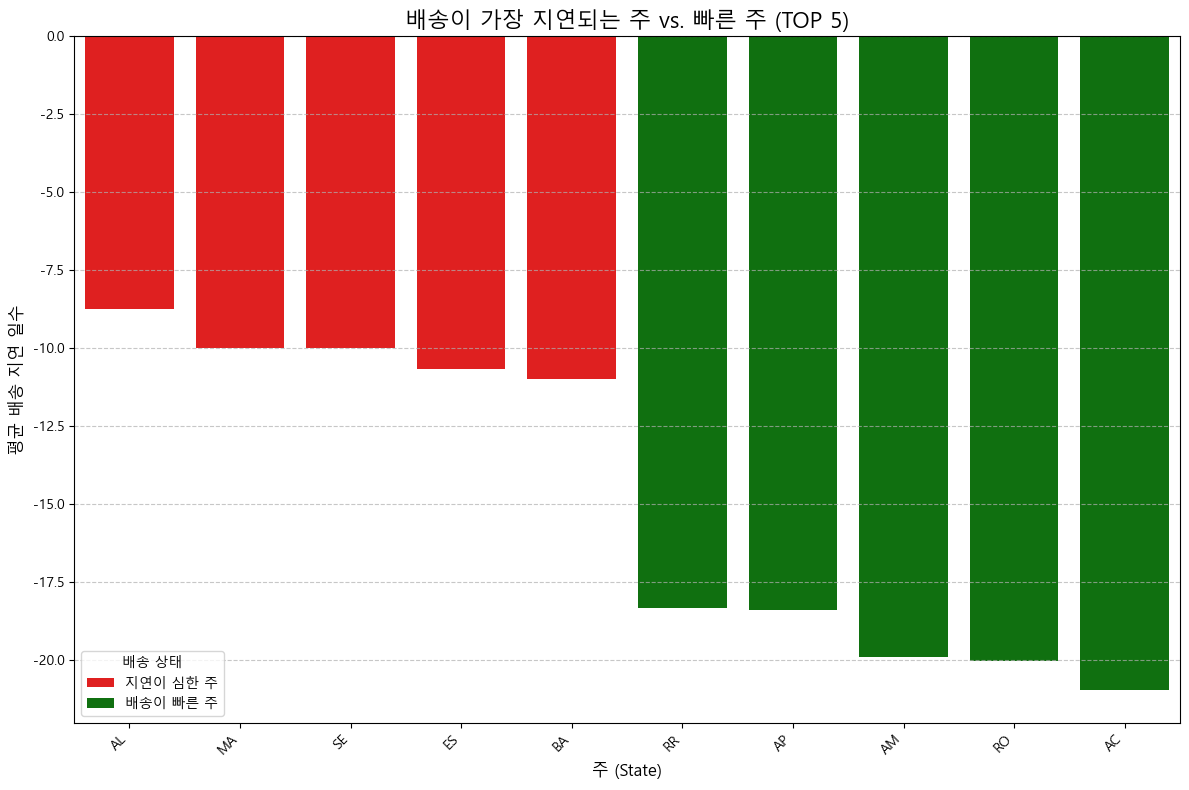

✔ 배송이 가장 지연되는 주와 빠른 주 비교 시각화 완료!


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df_cleaned 데이터셋이 이미 준비되어 있다고 가정
# 'delay_days' 컬럼은 배송 지연 일수를 담고 있어야 함

# 1. 'customer_state'별 평균 배송 지연 일수 계산
#     결측치 제거 및 그룹별 평균 계산
state_delay_avg = df_cleaned.groupby('customer_state')['delay_days'].mean().reset_index()

# 2. 배송 지연 일수를 기준으로 정렬
state_delay_avg = state_delay_avg.sort_values(by='delay_days', ascending=False)

# 3. 배송이 가장 지연되는 상위 5개 주 추출
top_5_delayed_states = state_delay_avg.head(5)
top_5_delayed_states['category'] = '지연이 심한 주'

# 4. 배송이 가장 빠른 상위 5개 주 추출
#    지연 일수가 음수(예상보다 빠른 배송)인 경우 포함하여 정렬
top_5_fastest_states = state_delay_avg.tail(5)
top_5_fastest_states['category'] = '배송이 빠른 주'

# 5. 두 데이터셋을 하나로 결합
comparison_df = pd.concat([top_5_delayed_states, top_5_fastest_states])

# 6. 시각화: 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df,
    x='customer_state',
    y='delay_days',
    hue='category',  # '지연이 심한 주'와 '배송이 빠른 주'를 색상으로 구분
    palette={'지연이 심한 주': 'red', '배송이 빠른 주': 'green'}, # 색상 지정
    dodge=False, # 막대가 겹치지 않도록 설정
)

plt.title('배송이 가장 지연되는 주 vs. 빠른 주 (TOP 5)', fontsize=16)
plt.xlabel('주 (State)', fontsize=12)
plt.ylabel('평균 배송 지연 일수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='배송 상태')
plt.tight_layout()
plt.show()

print("✔ 배송이 가장 지연되는 주와 빠른 주 비교 시각화 완료!")

#  정리 

1단계 : 데이터 준비 및 전처리:깨끗한데이터셋 만들기 

In [54]:
# 지리 데이터 로드
geolocation_df = pd.read_csv("olist_geolocation_dataset.csv")

# 컬럼 이름의 공백을 제거하고 소문자로 변환
geolocation_df.columns = geolocation_df.columns.str.strip().str.lower()

# 1. Geolocation 데이터 중복 제거
# 동일한 zip_code에 여러 위도, 경도 값이 있을 수 있으므로 첫 번째 값만 사용합니다.
geolocation_df = geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix')

# 2. 고객 데이터에 위도, 경도 정보 병합
df_cleaned = df_cleaned.merge(
    geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(
    columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'}
)

# 3. 판매자 데이터에 위도, 경도 정보 병합
df_cleaned = df_cleaned.merge(
    geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(
    columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'}
)

# 4. 불필요한 컬럼 제거
df_cleaned = df_cleaned.drop(columns=['geolocation_zip_code_prefix_x', 'geolocation_zip_code_prefix_y'])

print("✔ 지리 데이터 병합 완료! df_cleaned 업데이트")
print("\n[업데이트된 df_cleaned 컬럼]")
print(df_cleaned.columns)

✔ 지리 데이터 병합 완료! df_cleaned 업데이트

[업데이트된 df_cleaned 컬럼]
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'delay_days', 'customer_lat', 'customer_lng',
       'seller_lat', 'seller_lng', 'order_month', 'customer_lat',
     

과제1: 고객세분화 및 RFM분석

In [55]:
# 총 RFM 점수(RFM_Score)를 기준으로 등급 분류
conditions = [
    (rfm_table_geo['RFM_Score'] >= 14),
    (rfm_table_geo['RFM_Score'] >= 11) & (rfm_table_geo['RFM_Score'] < 14),
    (rfm_table_geo['RFM_Score'] >= 8) & (rfm_table_geo['RFM_Score'] < 11),
    (rfm_table_geo['RFM_Score'] >= 5) & (rfm_table_geo['RFM_Score'] < 8),
    (rfm_table_geo['RFM_Score'] < 5)
]

tiers = ['VIP', 'Gold', 'Silver', 'Bronze', 'General']

rfm_table_geo['Customer_Tier'] = np.select(conditions, tiers, default='Other')

# 결과 확인
print(rfm_table_geo.head())

# 등급별 고객 수 확인
print("\n✔ 등급별 고객 수")
print(rfm_table_geo['Customer_Tier'].value_counts())

                 customer_unique_id customer_state  Recency  Frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2             SP      115          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f             SP      118          1   
2  0000f46a3911fa3c0805444483337064             SC      541          1   
3  0000f6ccb0745a6a4b88665a16c9f078             PA      325          1   
4  0004aac84e0df4da2b147fca70cf8255             SP      292          1   

   Monetary R_Score F_Score M_Score  RFM_Score Customer_Segment Customer_Tier  
0    129.90       4       1       4          9            Other        Silver  
1     18.90       4       1       1          6            Other        Bronze  
2     69.00       1       1       2          4          At Risk       General  
3     25.99       2       1       1          4          At Risk       General  
4    180.00       2       1       5          8          At Risk        Silver  

✔ 등급별 고객 수
Customer_Tier
Silver     40354
Bronze     23594
Gold       2286

고객등급

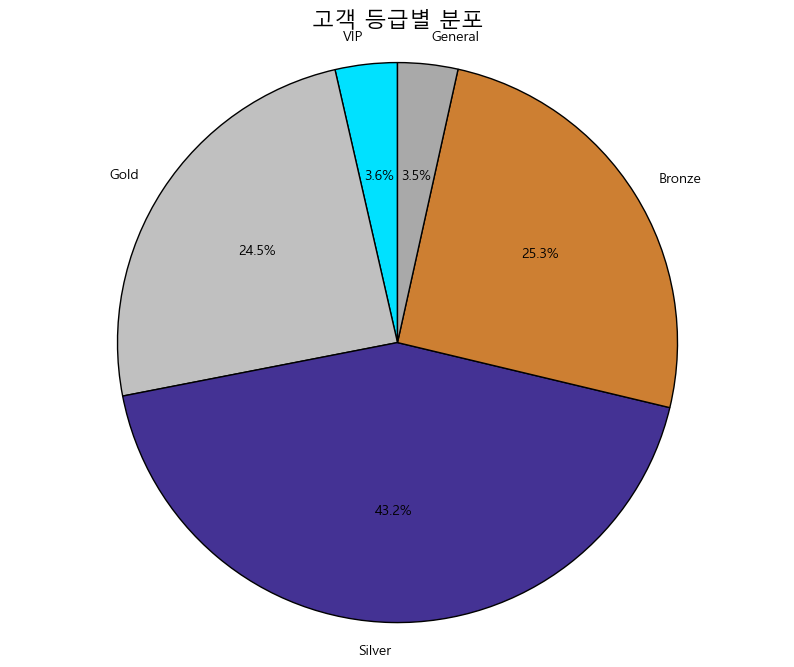

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\1832073342.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tier_counts.index, y=tier_counts.values, palette=colors)


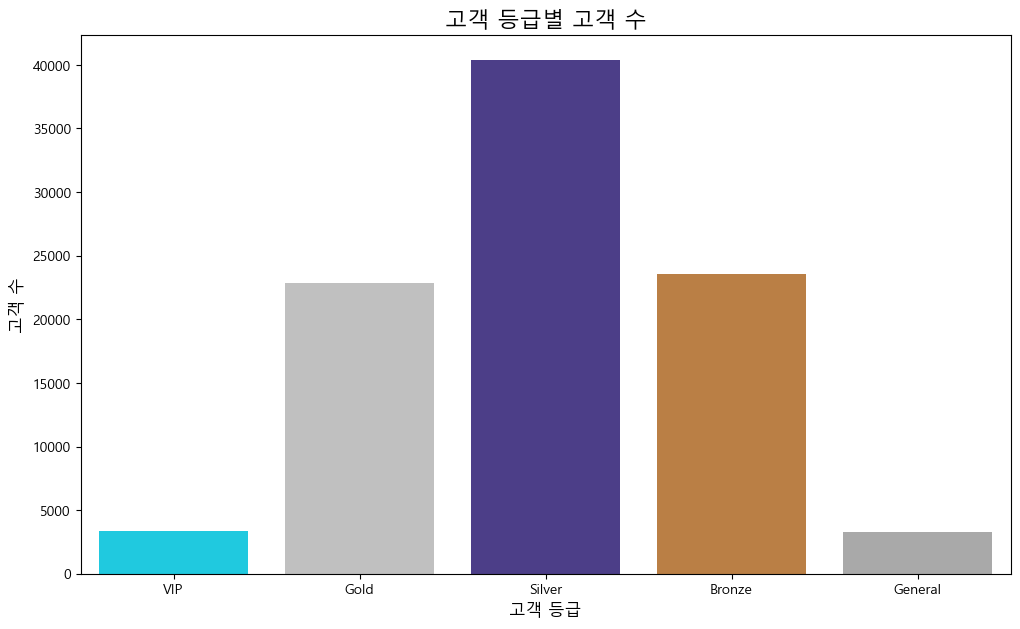

In [56]:
# --- 고객 등급별 분포를 시각화하는 코드 ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# 1. 등급별 고객 수를 집계
# (이 코드는 rfm_table_geo DataFrame이 이미 정의되었다고 가정합니다)
tier_counts = rfm_table_geo['Customer_Tier'].value_counts()

# 2. 시각화 순서와 색상 팔레트 설정 (VIP부터 보이도록)
tier_order = ['VIP', 'Gold', 'Silver', 'Bronze', 'General']
colors = ["#00E1FF", "#C0C0C0", "#443294", '#CD7F32', '#A9A9A9']
tier_counts = tier_counts.reindex(tier_order, fill_value=0)

# 3. 파이 차트 생성
plt.figure(figsize=(10, 8))
plt.pie(
    tier_counts,
    labels=tier_counts.index,
    autopct='%1.1f%%',  # 비율을 소수점 첫째 자리까지 표시
    startangle=90,      # 시작 각도 설정
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('고객 등급별 분포', fontsize=16)
plt.axis('equal')  # 원형을 유지
plt.show()

# --- 막대 그래프로도 확인 가능 ---
plt.figure(figsize=(12, 7))
sns.barplot(x=tier_counts.index, y=tier_counts.values, palette=colors)
plt.title('고객 등급별 고객 수', fontsize=16)
plt.xlabel('고객 등급', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.show()

이것을 보면 silver 고객이 많은건 튼튼한 고객 흔히 말해 꾸준히 매출을 만들어내는 주타겟입니다. 

그럼 어떤 고객이 많이 지출하니? 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\1582761059.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tier_monetary_total.index, y=tier_monetary_total.values, palette='viridis')


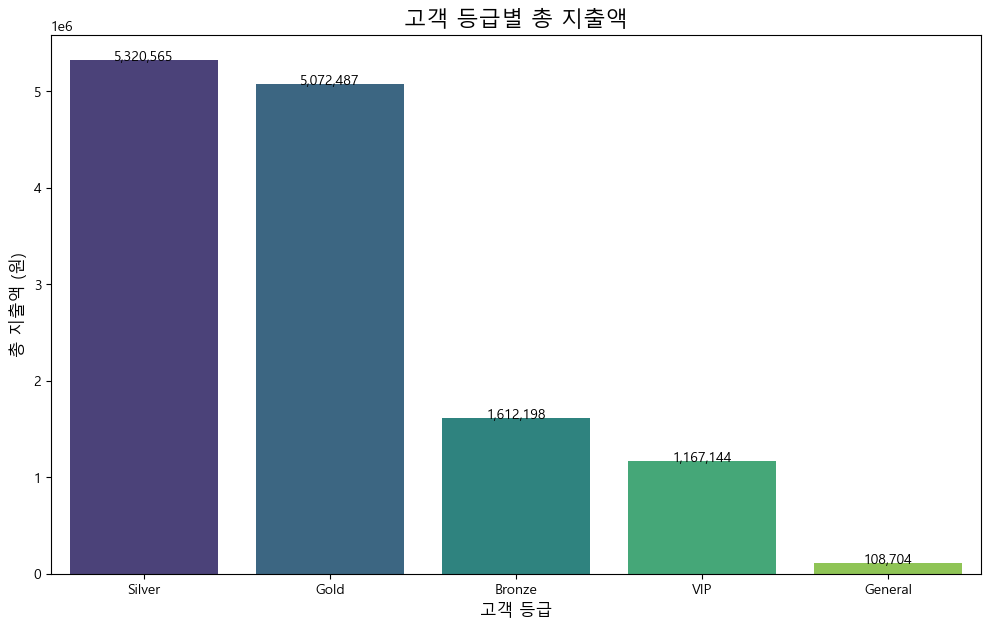

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\1582761059.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tier_monetary_avg.index, y=tier_monetary_avg.values, palette='plasma')


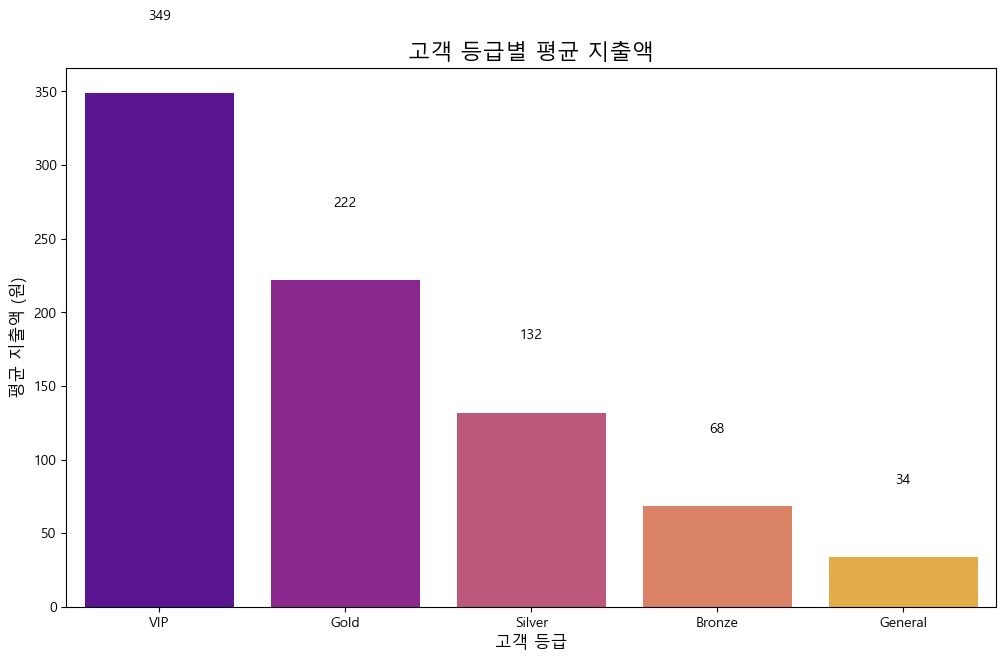

In [57]:
# --- 등급별 총 지출 막대 그래프 시각화 ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (이 코드는 rfm_table_geo DataFrame이 이미 정의되었다고 가정합니다)

# 등급별 총 지출액 집계 및 내림차순 정렬
tier_monetary_total = rfm_table_geo.groupby('Customer_Tier')['Monetary'].sum().sort_values(ascending=False)

# 그래프 생성
plt.figure(figsize=(12, 7))
sns.barplot(x=tier_monetary_total.index, y=tier_monetary_total.values, palette='viridis')

# 그래프 제목과 라벨 설정
plt.title('고객 등급별 총 지출액', fontsize=16)
plt.xlabel('고객 등급', fontsize=12)
plt.ylabel('총 지출액 (원)', fontsize=12)

# 값 표시
for index, value in enumerate(tier_monetary_total):
    plt.text(index, value + 1000, f'{value:,.0f}', ha='center')

plt.show()

# --- 등급별 평균 지출 막대 그래프 시각화 ---
tier_monetary_avg = rfm_table_geo.groupby('Customer_Tier')['Monetary'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=tier_monetary_avg.index, y=tier_monetary_avg.values, palette='plasma')

plt.title('고객 등급별 평균 지출액', fontsize=16)
plt.xlabel('고객 등급', fontsize=12)
plt.ylabel('평균 지출액 (원)', fontsize=12)

for index, value in enumerate(tier_monetary_avg):
    plt.text(index, value + 50, f'{value:,.0f}', ha='center')

plt.show()

소수의 vip 가 지출액이 높다는것을 알수있다 

골드는 고객별 총 지출액이 2순위 고객등급별 평균 지출액도 2위 로 안정적인 성과를 보인다 따라서 gold를 vip 로 만드는 전략을 제시한다. 

# gold 고객을 위한 전략 성장동가전략 

대안1:vip로 가는 등급업 프로모션  

고객의 지난 구매액 추적분석하여 vip가 될수있는 잠재력을 돋아서 추가 구매 유도 방안 

대안2: 상품 카테고리별 개인화 추천 
고객이 과거에 자주 구매했던 상푼카테고리에 더높은 가격대의 신제품이나 프리미엄상품 추천 

# vip고객을 위한 전략 독점적가치제공 

대안 1: 'VIP 전용' 프라이빗 서비스

방식: 모든 VIP 고객에게 전담 상담사를 지정하거나, 'VIP 전용' 전화/채팅 채널을 운영하여 문의 사항을 빠르게 해결해줍니다.

목표: 문제 해결 과정의 편의성을 높여 이탈을 방지합니다.


대안 2: '구매에 기반한' 깜짝 선물

방식: 정기적인 할인이 아닌, 구매 내역을 바탕으로 한 맞춤형 선물을 보냅니다.


예시("저희 VIP 고객이신 당신을 위해, 이전에 구매하신 상품과 어울리는 소품을 준비했습니다."와 같은 메시지와 함께 작은 선물을 제공한다.)


대안 3: '피드백' 참여 기회 제공
방식: 신규 서비스나 상품에 대한 '클로즈 베타 테스트'에 VIP 고객을 초대

목표: 그들의 의견을 수렴하여 비즈니스에 직접 참여하고 있다는 자부심을 느끼고 아 내가 이맛에 vip 하지 

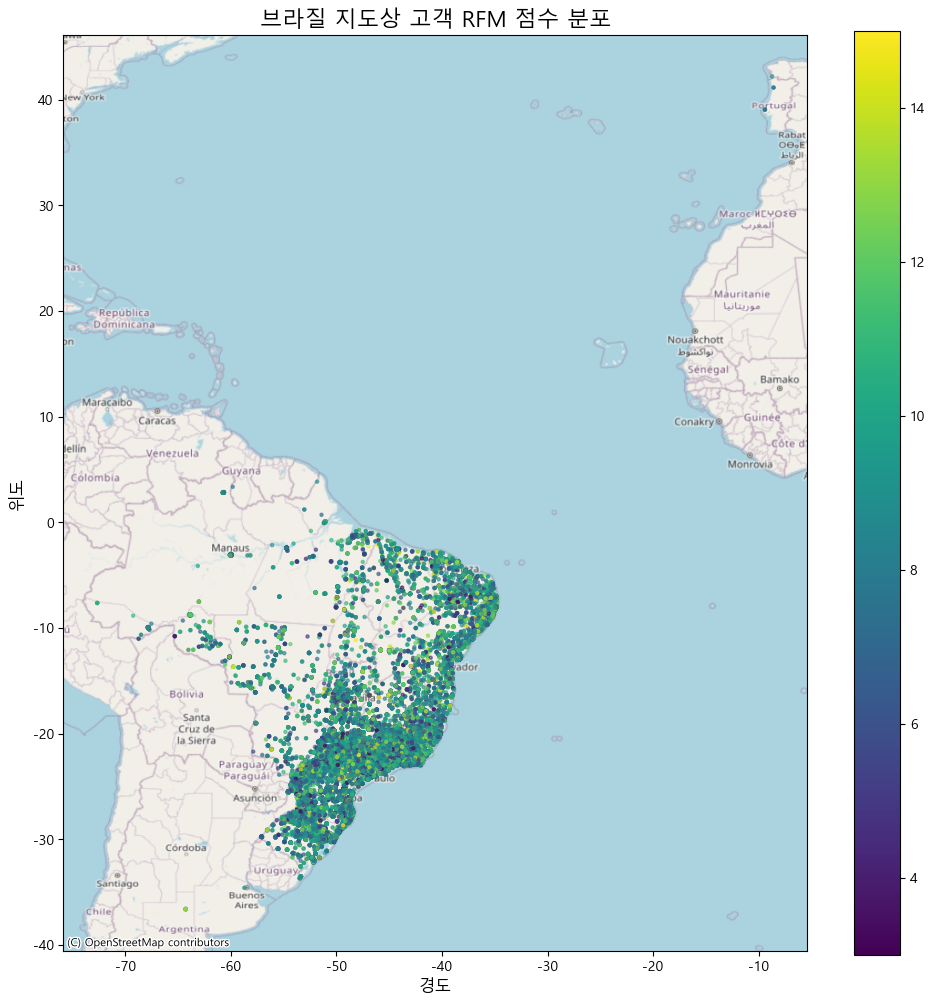

In [42]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# df_cleaned에 이미 병합된 위도, 경도 정보 활용
geo_customer_data = df_cleaned.drop_duplicates(subset='customer_unique_id').copy()
geo_customer_data = geo_customer_data.merge(rfm_table_geo, on=['customer_unique_id', 'customer_state'], how='left')

# 유효한 위도, 경도 정보만 남기기
geo_customer_data = geo_customer_data.dropna(subset=['customer_lat', 'customer_lng']).copy()

# 데이터프레임을 GeoDataFrame으로 변환 (CRS 설정)
gdf = gpd.GeoDataFrame(
    geo_customer_data, 
    geometry=gpd.points_from_xy(geo_customer_data['customer_lng'], geo_customer_data['customer_lat']),
    crs="EPSG:4326"
)

# 시각화: 지도를 기반으로 고객 RFM 점수 분포 표시
fig, ax = plt.subplots(figsize=(12, 12))

gdf.plot(
    ax=ax,
    column='RFM_Score',
    cmap='viridis',
    legend=True,
    markersize=5,
    alpha=0.6,
)

# 배경 지도 추가
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('브라질 지도상 고객 RFM 점수 분포', fontsize=16)
ax.set_xlabel('경도', fontsize=12)
ax.set_ylabel('위도', fontsize=12)
plt.show()

우리 고객들이 브라질의 어느지점에 살고있는가 ? 

저 지도를 보면 상파울루와 리우데자네이루에 주변 고객들이 군집해있는것을 알수있습니다. 

과제2: 배송성과 분석및 지역별 물류 최적화 방안

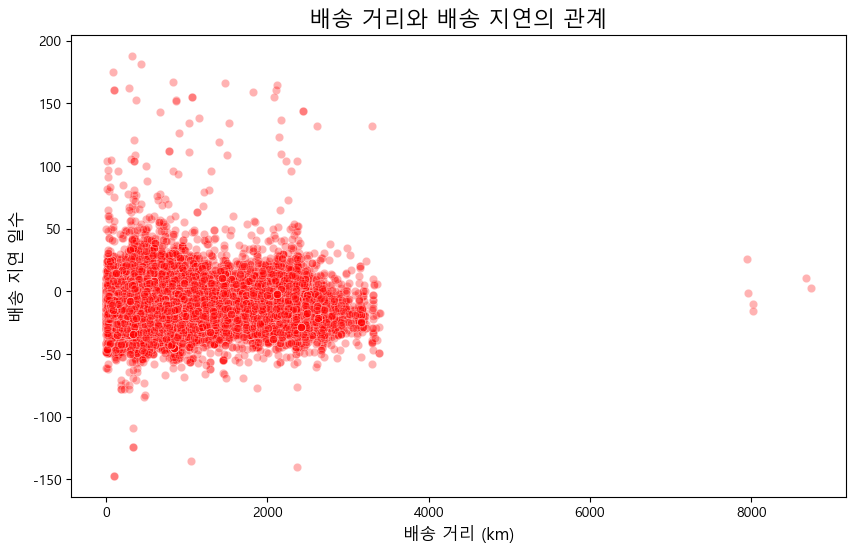

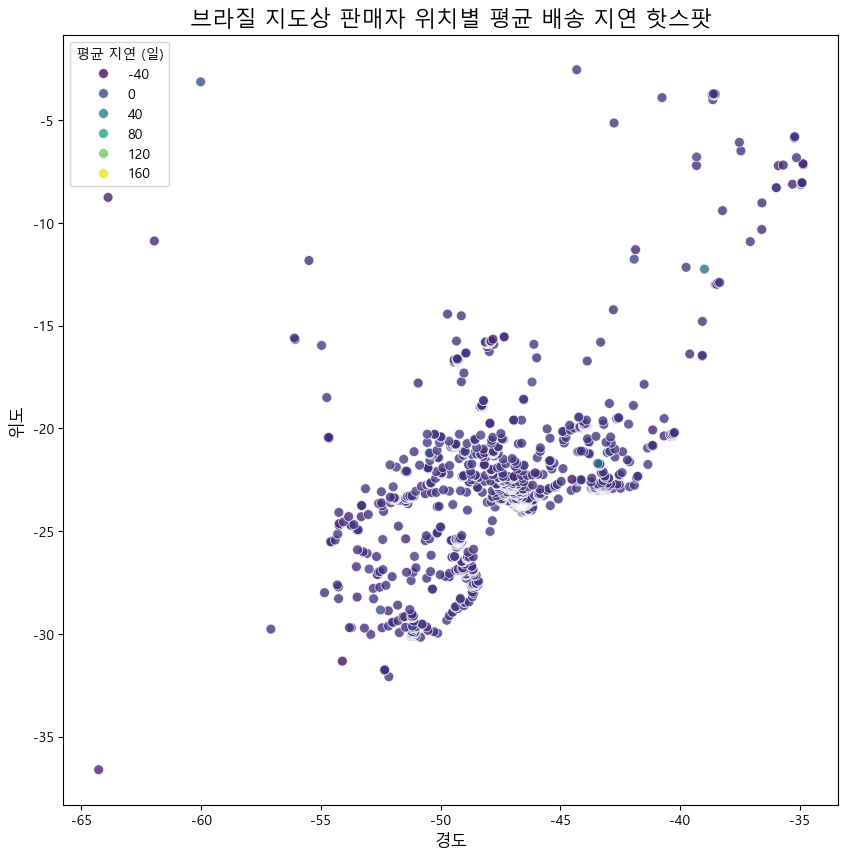

In [43]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit

# --- 1. 배송 거리(km) 계산 ---
# Haversine 공식을 사용하여 고객과 판매자 간의 거리를 계산합니다.
# 유효한 위도, 경도 정보가 있는 행만 필터링
df_geo_clean = df_cleaned.dropna(subset=['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']).copy()

def calculate_distance(row):
    try:
        start_point = (row['seller_lat'], row['seller_lng'])
        end_point = (row['customer_lat'], row['customer_lng'])
        return haversine(start_point, end_point, unit=Unit.KILOMETERS)
    except:
        return np.nan

df_geo_clean['distance_km'] = df_geo_clean.apply(calculate_distance, axis=1)

# --- 2. 배송 거리와 배송 지연의 관계 분석 ---
# 상관관계를 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_geo_clean,
    x='distance_km',
    y='delay_days',
    alpha=0.3,
    color='red'
)
plt.title('배송 거리와 배송 지연의 관계', fontsize=16)
plt.xlabel('배송 거리 (km)', fontsize=12)
plt.ylabel('배송 지연 일수', fontsize=12)
plt.show()

# --- 3. 지도를 활용한 배송 지연 핫스팟 분석 (색상 개선) ---
# 판매자 위치를 기준으로 배송 지연의 심각성을 시각화합니다.
seller_delay_map = df_geo_clean.groupby(['seller_lat', 'seller_lng']).agg(
    avg_delay=('delay_days', 'mean')
).reset_index()

plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=seller_delay_map,
    x='seller_lng',
    y='seller_lat',
    hue='avg_delay',
    palette='viridis',  # <--- 색상이 뚜렷한 'viridis' 팔레트 사용
    s=50,               # <--- 점의 크기 증가
    alpha=0.8,          # <--- 투명도 유지
)
plt.title('브라질 지도상 판매자 위치별 평균 배송 지연 핫스팟', fontsize=16)
plt.xlabel('경도', fontsize=12)
plt.ylabel('위도', fontsize=12)
plt.legend(title='평균 지연 (일)')
plt.show()

특히 이 밀집 지역은 브라질의 경제 및 인구 중심지인 상파울루(São Paulo)와 리우데자네이루(Rio de Janeiro)를 포함하고 있습니다.

위도: 약 -20°에서 -25° 사이

경도: 약 -45°에서 -50° 사이

이 지역에 판매자들이 집중된 이유는 다음과 같습니다.

경제 활동 중심지: 상파울루와 리우데자네이루는 브라질의 가장 큰 두 도시로, 물류 및 상업 활동이 가장 활발합니다.

인구 밀집: 고객과 판매자가 가장 많이 밀집해 있어 자연스럽게 전자상거래 활동이 가장 크게 일어나는 지역입니다.

# 상파울로우와 리우데자네이루 어느지역에 고객이 많이 유입되어있을까?

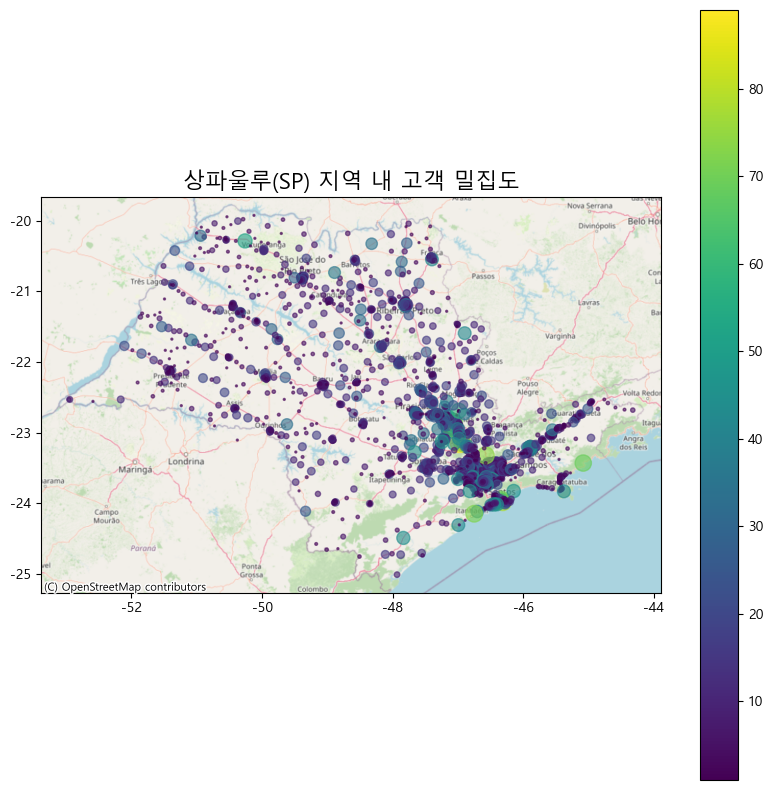

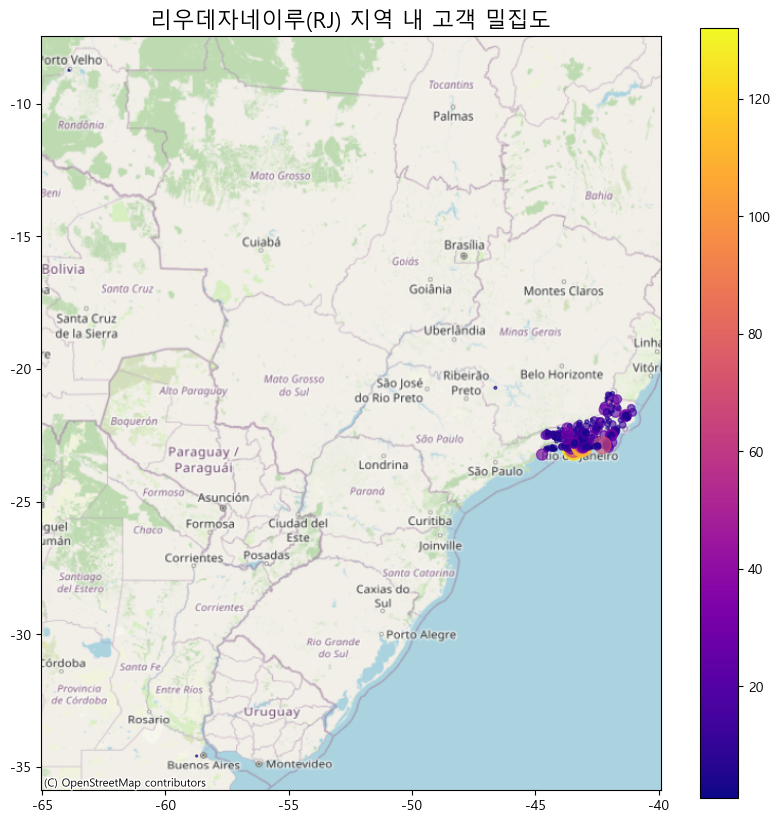

In [52]:
# 필요한 라이브러리 불러오기
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns

# (이 코드는 df_cleaned와 geolocation_df가 이미 정의되었다고 가정합니다)

# --- 1. 상파울루(SP) 지역 고객 데이터 준비 ---
sp_customers = df_cleaned[df_cleaned['customer_state'] == 'SP'].copy()
# 우편번호별 고객 수 집계
sp_customer_counts = sp_customers.groupby('customer_zip_code_prefix').agg(
    customer_count=('customer_unique_id', 'nunique'),
    customer_lat=('customer_lat', 'mean'),
    customer_lng=('customer_lng', 'mean')
).reset_index()

# 결측치 제거
sp_customer_counts.dropna(subset=['customer_lat', 'customer_lng'], inplace=True)

# GeoDataFrame 생성
gdf_sp = gpd.GeoDataFrame(
    sp_customer_counts,
    geometry=gpd.points_from_xy(sp_customer_counts.customer_lng, sp_customer_counts.customer_lat),
    crs="EPSG:4326"
)

# --- 2. 리우데자네이루(RJ) 지역 고객 데이터 준비 ---
rj_customers = df_cleaned[df_cleaned['customer_state'] == 'RJ'].copy()
# 우편번호별 고객 수 집계
rj_customer_counts = rj_customers.groupby('customer_zip_code_prefix').agg(
    customer_count=('customer_unique_id', 'nunique'),
    customer_lat=('customer_lat', 'mean'),
    customer_lng=('customer_lng', 'mean')
).reset_index()

# 결측치 제거
rj_customer_counts.dropna(subset=['customer_lat', 'customer_lng'], inplace=True)

# GeoDataFrame 생성
gdf_rj = gpd.GeoDataFrame(
    rj_customer_counts,
    geometry=gpd.points_from_xy(rj_customer_counts.customer_lng, rj_customer_counts.customer_lat),
    crs="EPSG:4326"
)

# --- 3. 그래프 시각화 (상파울루) ---
fig, ax = plt.subplots(figsize=(10, 10))
gdf_sp.plot(
    ax=ax,
    column='customer_count',
    cmap='viridis',
    legend=True,
    markersize=sp_customer_counts['customer_count'] * 2, # 고객 수에 따라 점 크기 조절
    alpha=0.6,
    label='고객 수'
)
ctx.add_basemap(ax, crs=gdf_sp.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('상파울루(SP) 지역 내 고객 밀집도', fontsize=16)
plt.show()

# --- 4. 그래프 시각화 (리우데자네이루) ---
fig, ax = plt.subplots(figsize=(10, 10))
gdf_rj.plot(
    ax=ax,
    column='customer_count',
    cmap='plasma',
    legend=True,
    markersize=rj_customer_counts['customer_count'] * 2,
    alpha=0.6,
    label='고객 수'
)
ctx.add_basemap(ax, crs=gdf_rj.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('리우데자네이루(RJ) 지역 내 고객 밀집도', fontsize=16)
plt.show()

상파울루(itaquera) 는 동부구역에 위치한 대규모지역 그중 고객이 많은곳은 itaquera 이다  이도시의 특징을 보면 위치 및  교통은 
상파울루의 동부에 위치하며  코린치안스-이타케라 역 (Estação Corinthians-Itaquera)이 있어 대중교통이 편리하다 

축구 문화:
브라질의 유명 축구 클럽인 코린치안스가 훈련장과 2014년 FIFA 월드컵 경기장으로 사용된 아레나 코린치안스 (Arena Corinthians)을 이 지역에 건설한 것으로 유명합니다. 

상업 시설:
Shopping Metrô Itaquera 쇼핑몰이 메트로 역 옆에 있으며, 브라질 정부의 행정 서비스 기관인 Poupatempo 지점도 있습니다. 
인구 및 문화:

이타케라는 지난 수십 년간 인구가 크게 성장한 지역이며, 축구뿐만 아니라 다양한 문화 행사와 지역 전통을 경험할 수 있는 곳입니다. 



 리우데자네이루에서는 남부 지역(Zona Sul)과 바하다치주카(Barra da Tijuca)에 고객이 많이 모여 있습니다.
이지역들은 브라질에서 가장 인구밀도가 높고 상업이 활발한 곳입니다

남부지역으로는 코파카바나,이파네마,레블론 등 유명하고 부유한 해변가 동네들이 모여있어 구매력이 높은 고객이 밀집되어있습니다.

바하다치주카는 현대적인 고층빌딩과 쇼핑몰이 많은지역으로 최근 빠르게 성장하며 부유층과 전문직 종사자들이 많이거주하는곳입니다. 

# 과제3:상품 카테고리별 수요예측 및 재고관리 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\2718124501.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_sales_top5['order_month'] = sp_sales_top5['order_month'].astype(str)


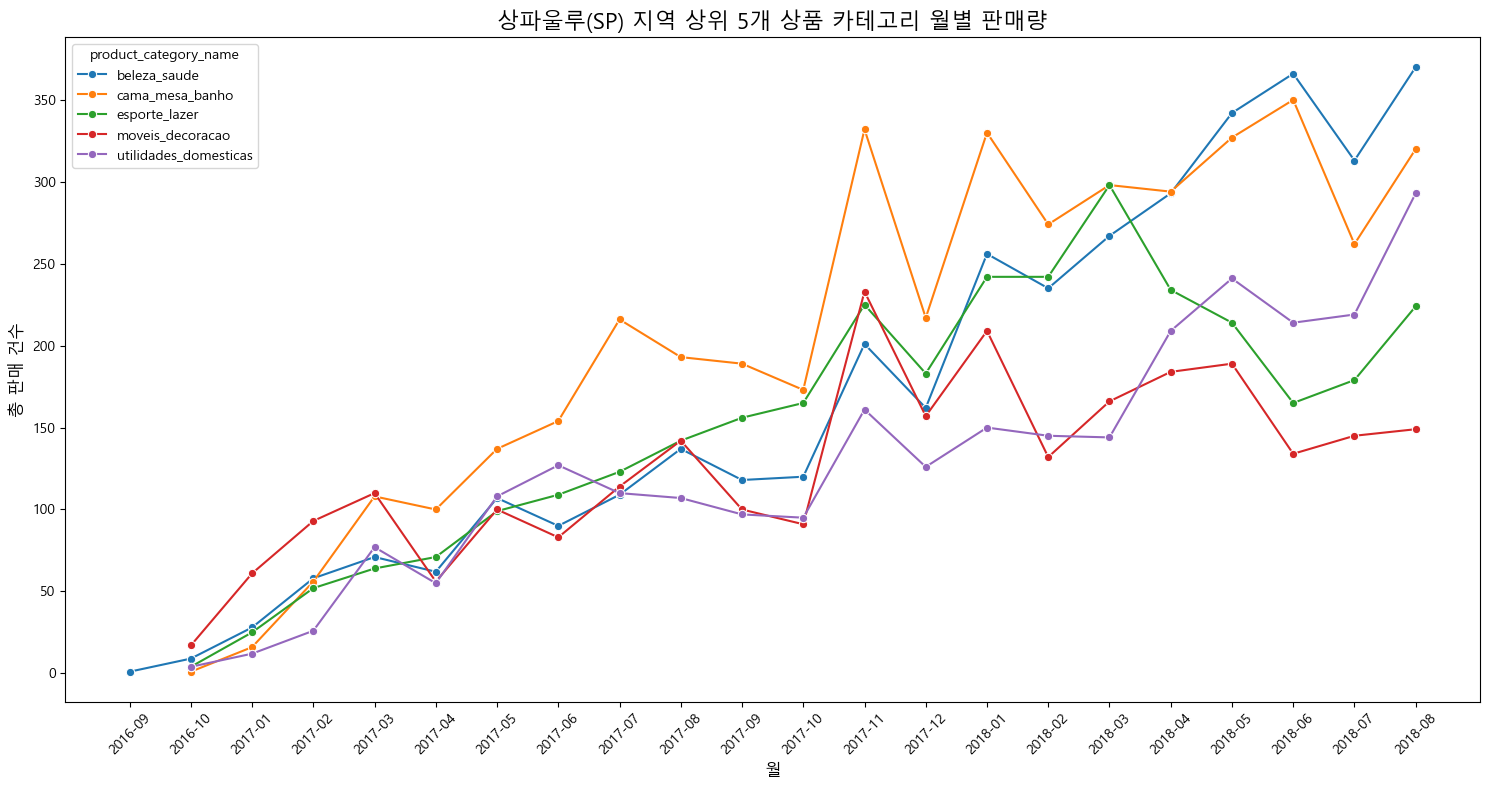

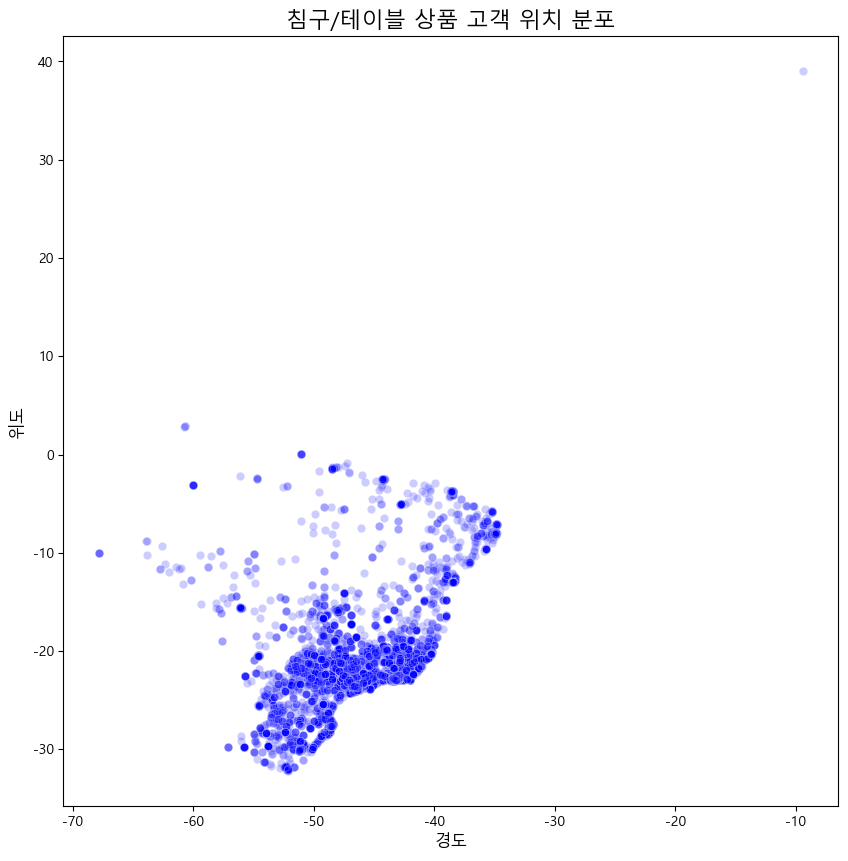

In [40]:
# --- 1. 월별, 지역별 판매 트렌드 분석을 위한 데이터 준비 ---
# 'order_purchase_timestamp' 컬럼에서 월과 연도를 추출합니다.
df_cleaned['order_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M')

# 각 월별, 지역별, 상품 카테고리별로 주문 건수를 집계합니다.
monthly_sales_geo = df_cleaned.groupby(['order_month', 'customer_state', 'product_category_name']).agg(
    total_sales=('order_id', 'nunique')
).reset_index()

# --- 2. 특정 지역(SP 주)의 상품별 판매 추이 시각화 ---
# 상파울루(SP) 지역의 데이터만 필터링합니다.
sp_sales_data = monthly_sales_geo[monthly_sales_geo['customer_state'] == 'SP'].copy()
top_5_sp_categories = sp_sales_data.groupby('product_category_name')['total_sales'].sum().sort_values(ascending=False).head(5).index.tolist()
sp_sales_top5 = sp_sales_data[sp_sales_data['product_category_name'].isin(top_5_sp_categories)]

# 'order_month'를 문자열로 변환하여 Seaborn 호환성 확보
sp_sales_top5['order_month'] = sp_sales_top5['order_month'].astype(str)

plt.figure(figsize=(15, 8))
sns.lineplot(data=sp_sales_top5, x='order_month', y='total_sales', hue='product_category_name', marker='o')
plt.title('상파울루(SP) 지역 상위 5개 상품 카테고리 월별 판매량', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 판매 건수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. 특정 상품의 지리적 수요 분포 시각화 ---
# 예시: 가장 잘 팔리는 'bed_bath_table' 상품의 지리적 분포
bed_bath_data = df_cleaned[df_cleaned['product_category_name'] == 'cama_mesa_banho'].copy()

plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=bed_bath_data,
    x='customer_lng',
    y='customer_lat',
    alpha=0.2,
    color='blue'
)
plt.title('침구/테이블 상품 고객 위치 분포', fontsize=16)
plt.xlabel('경도', fontsize=12)
plt.ylabel('위도', fontsize=12)
plt.show()

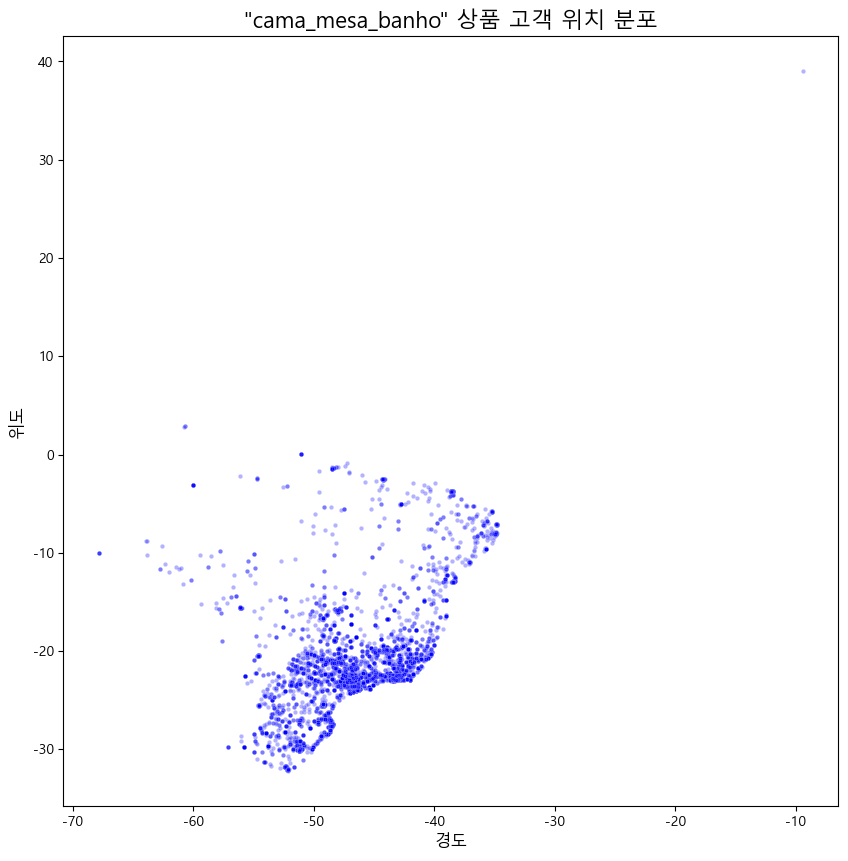

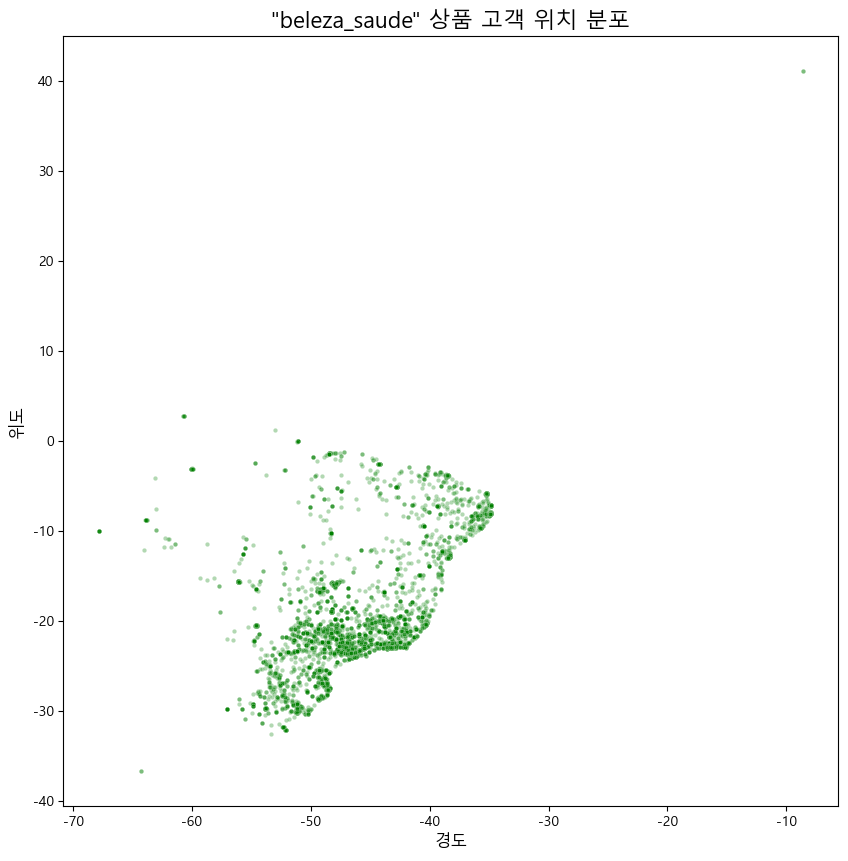

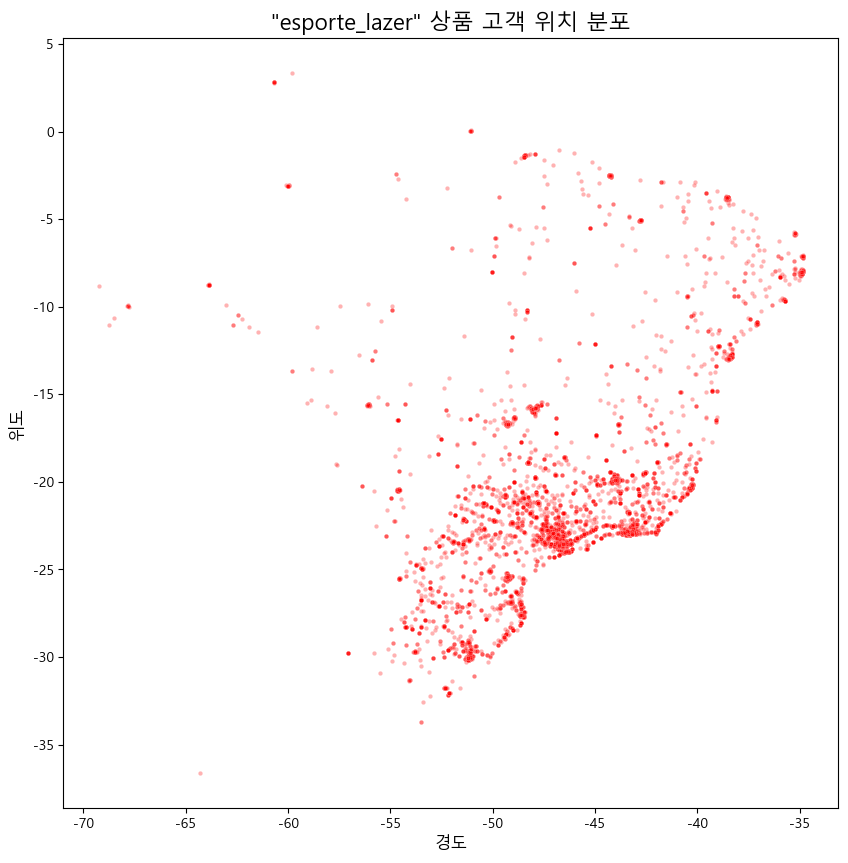

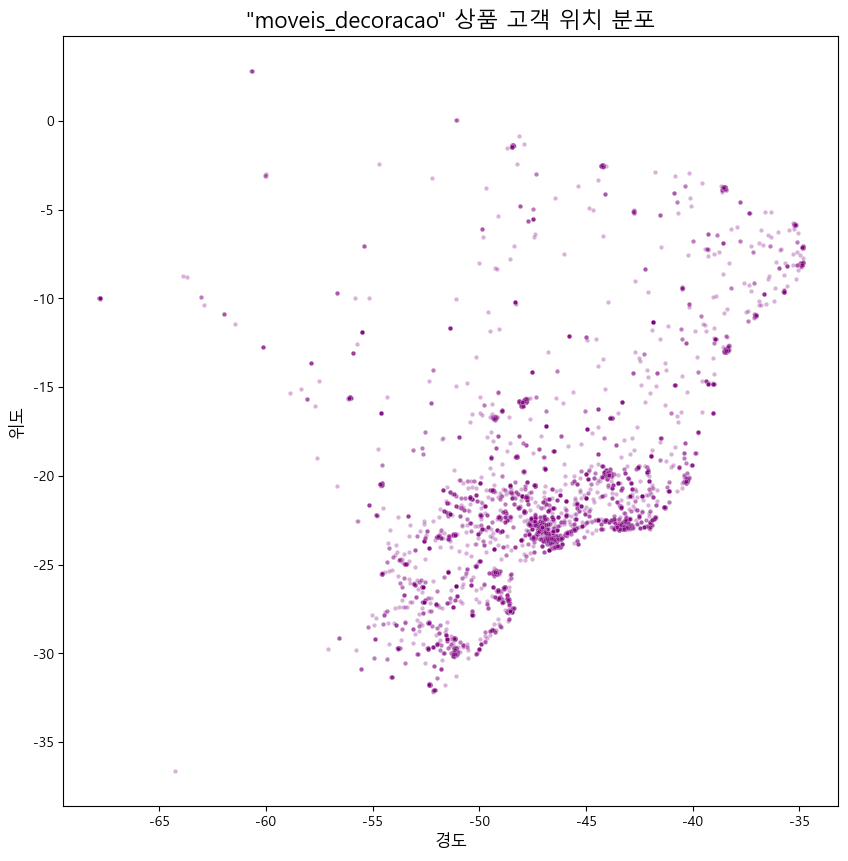

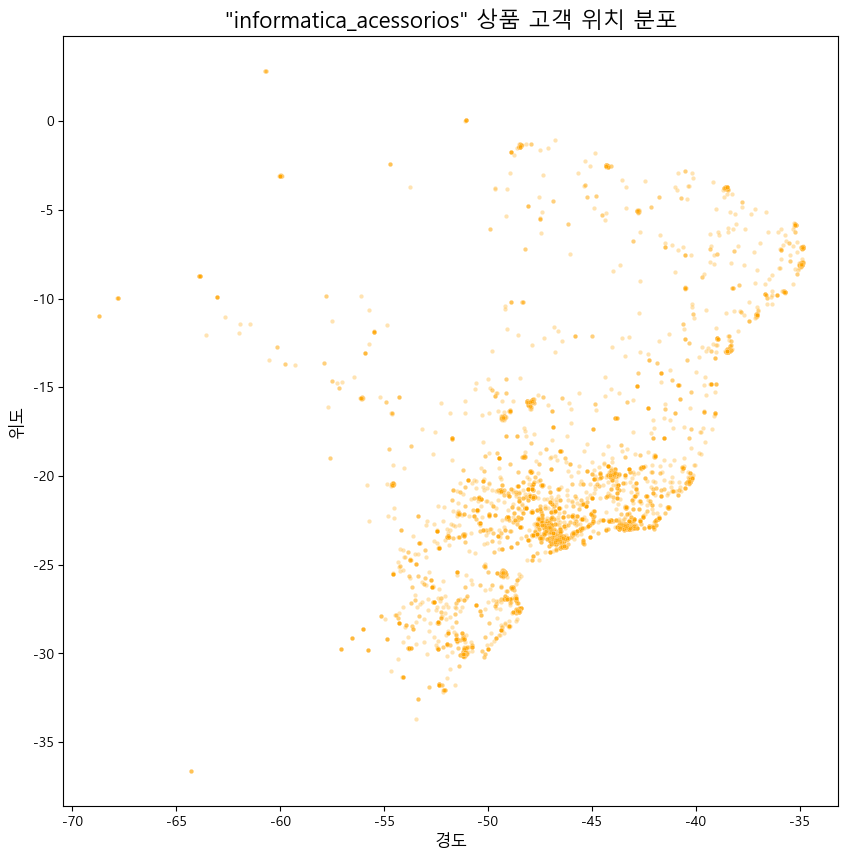

✔ 상위 5개 상품 카테고리별 고객 분포 시각화 완료!


In [44]:
# 전체 데이터에서 상위 5개 상품 카테고리 찾기
top_5_categories = df_cleaned['product_category_name'].value_counts().head(5).index.tolist()

# 시각화 팔레트 설정
colors = ['blue', 'green', 'red', 'purple', 'orange']

# 각 상위 5개 카테고리별로 고객 위치 분포 시각화
for i, category in enumerate(top_5_categories):
    category_data = df_cleaned[df_cleaned['product_category_name'] == category].copy()

    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        data=category_data,
        x='customer_lng',
        y='customer_lat',
        alpha=0.3,
        color=colors[i],
        s=10
    )
    plt.title(f'"{category}" 상품 고객 위치 분포', fontsize=16)
    plt.xlabel('경도', fontsize=12)
    plt.ylabel('위도', fontsize=12)
    plt.show()

print("✔ 상위 5개 상품 카테고리별 고객 분포 시각화 완료!")

히트맵

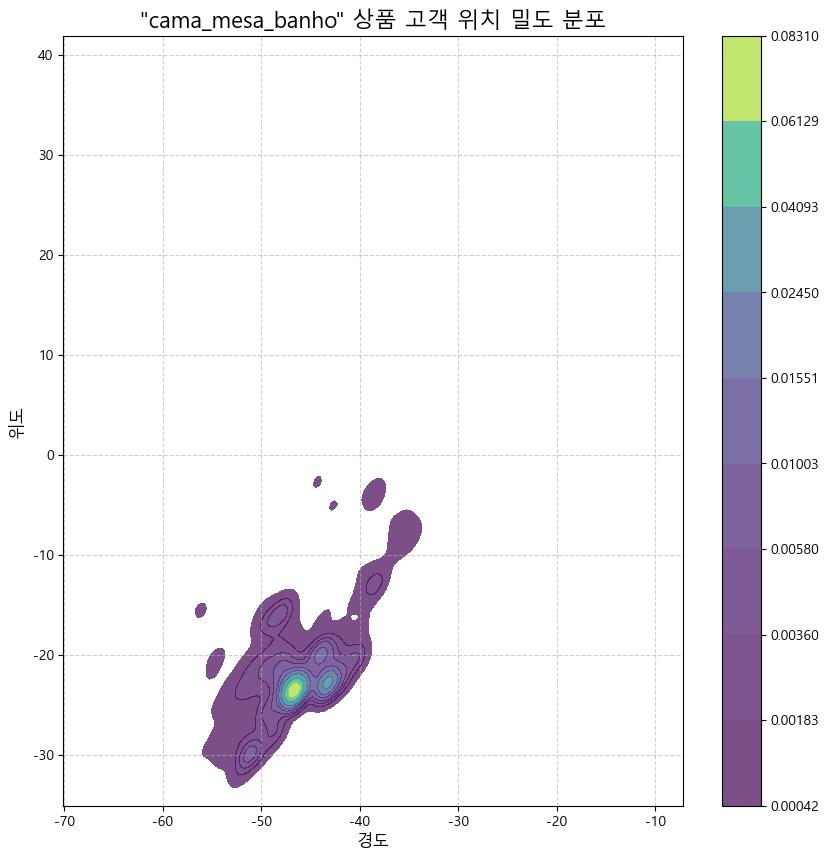

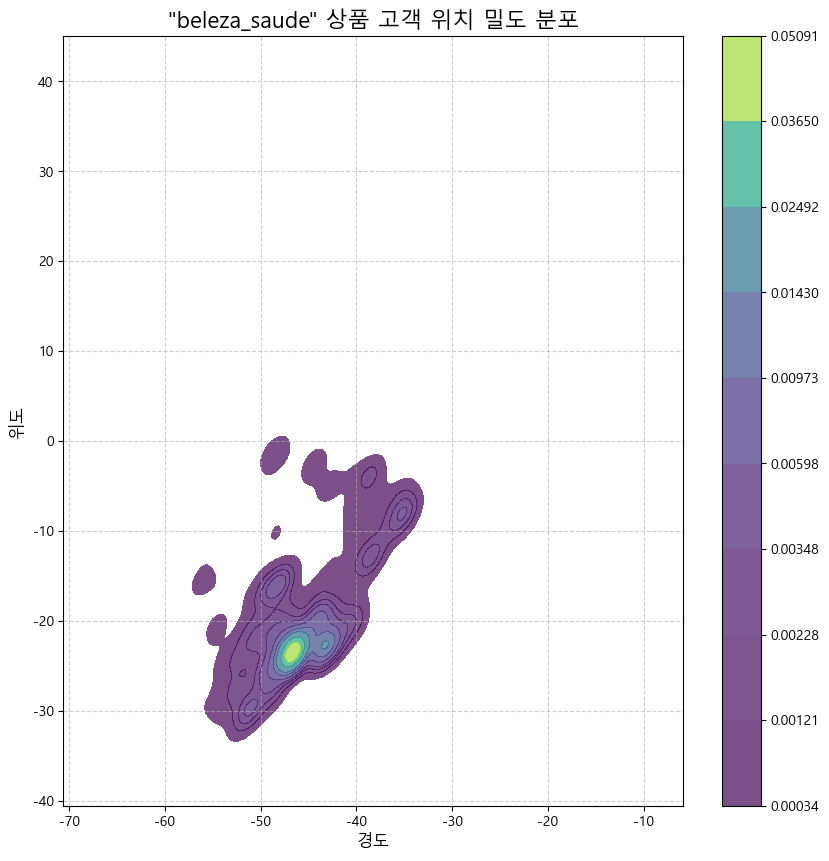

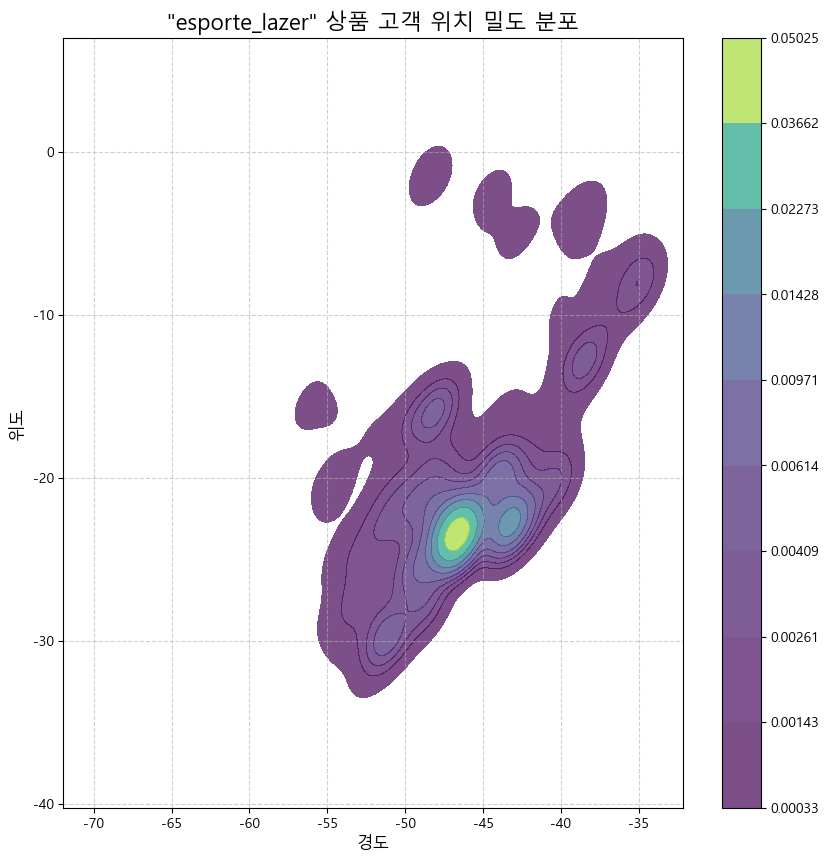

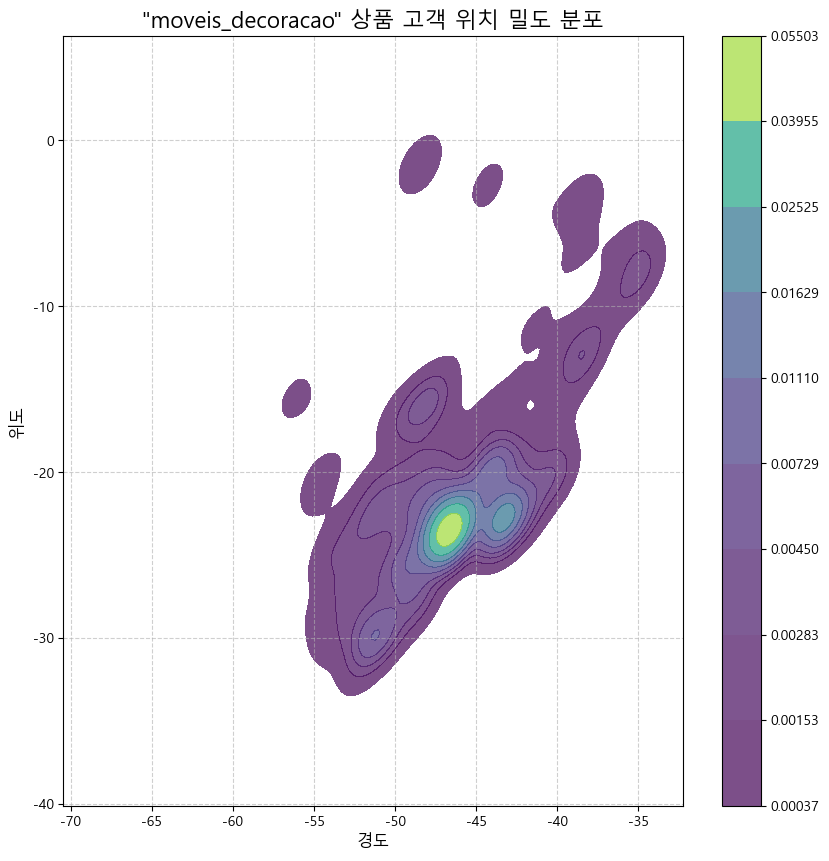

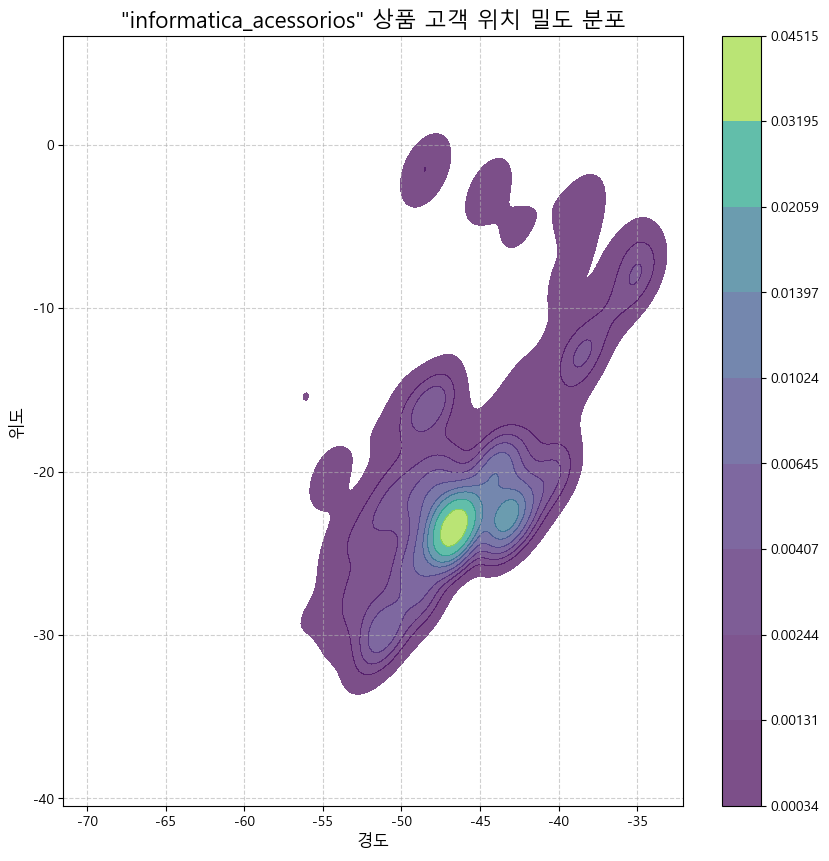

✔ 상위 5개 상품 카테고리별 고객 분포 히트맵 시각화 완료!


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 데이터에서 상위 5개 상품 카테고리 찾기
top_5_categories = df_cleaned['product_category_name'].value_counts().head(5).index.tolist()

# 각 상위 5개 카테고리별로 고객 위치 분포 시각화
for i, category in enumerate(top_5_categories):
    # 해당 카테고리 데이터 필터링
    category_data = df_cleaned[df_cleaned['product_category_name'] == category].copy()

    plt.figure(figsize=(10, 10))
    # 히트맵 시각화 (kdeplot 사용)
    sns.kdeplot(
        data=category_data,
        x='customer_lng',
        y='customer_lat',
        cmap='viridis',  # 원하는 색상 팔레트 선택
        fill=True,
        alpha=0.7,
        cbar=True  # 컬러바 추가
    )
    
    plt.title(f'"{category}" 상품 고객 위치 밀도 분포', fontsize=16)
    plt.xlabel('경도', fontsize=12)
    plt.ylabel('위도', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("✔ 상위 5개 상품 카테고리별 고객 분포 히트맵 시각화 완료!")

시각화 한자료 소비되는 품목은 브라질 어디에 많이 분포해있나 ? (분류: 강한밀집 과 분산된분포 )

상위 5개를 분석한결과 강한 밀집에는 강한 밀집: '침대/욕실/테이블 용품(cama_mesa_banho)', '건강/미용(beleza_saude)' 같은 생활용품은 상파울루와 리우데자네이루에 강하게 밀집된 패턴을 보인다.  이는 대도시에서 주로 소비되는 품목일 가능성이 높을것으로 추정된다.
분산된 분포를 보이는 특징은  '전자제품(eletronicos)', '컴퓨터/액세서리(informatica_acessorios)'와 같은 일부 카테고리에서는 상대적으로 밀도 영역이 넓게 퍼져 보일 수 있다. 이는 필수품이거나 전 국민을 대상으로 하는 범용적인 상품이므로, 다른 중소 도시나 지방에서도 꾸준한 구매가 이루어지기 때문이다

이 분포도를 보면 수요가 브라질 남동부 지역에 매우 집중해있다는것을 알수았다.  시장의 핵심 은 남동부대도시 이며 그중 특히 상파울루와 리우데자네이루를 중심으로 형성되고있다는것을 알수있다. 
정확히 디테일 하면 (침구/테이블)은 해안가 도시에 고객이 매우 밀집되어있는반면 다른 상품은 내륙으로 더넓게 퍼져있다 ㅡ즉 지역별로 선호하는 상품이 다르다는것을 알수있다 

지역별 인기순위 그중고객층이많은 상파울로우 와 rio 중심으로 

--- 상파울루(SP) 이타케라 지역 상위 5개 인기 상품 ---
product_category_name
cama_mesa_banho           56
beleza_saude              32
moveis_decoracao          32
brinquedos                28
informatica_acessorios    25
Name: count, dtype: int64

--- 리우데자네이루(RJ) 바하다치주카 지역 상위 5개 인기 상품 ---
product_category_name
cama_mesa_banho           187
moveis_decoracao          139
esporte_lazer             116
informatica_acessorios     98
beleza_saude               95
Name: count, dtype: int64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\1739968363.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=itaquera_top_products.values, y=itaquera_top_products.index, ax=axes[0], palette='viridis')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20356\1739968363.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barra_tijuca_top_products.values, y=barra_tijuca_top_products.index, ax=axes[1], palette='plasma')


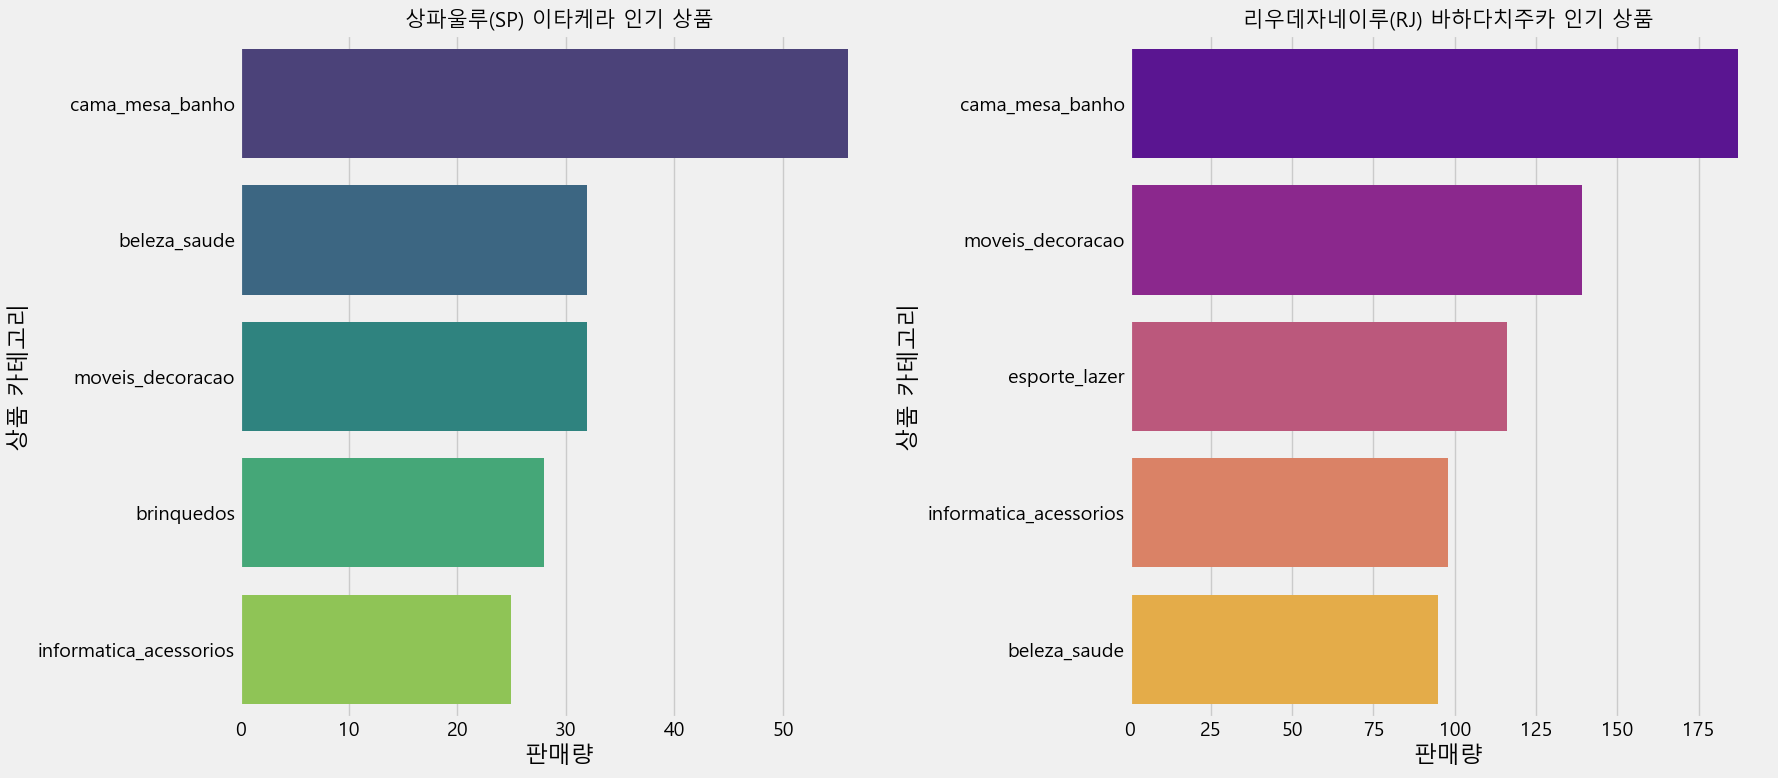


✔ 이타케라와 바하다치주카 지역별 인기 상품 순위 비교 완료!


In [66]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Mac 사용자용)
# plt.rcParams['font.family'] = 'AppleGothic'
# 윈도우 사용자용 (Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# (이 코드는 df_cleaned DataFrame이 이미 정의되었다고 가정합니다)

# --- 1. 상파울루 이타케라 지역 데이터 분리 ---
# Itaquera 우편번호(CEP) 식별
itaquera_zip_prefixes = [str(x) for x in range(8210, 8296)]
itaquera_data = df_cleaned[
    (df_cleaned['customer_state'] == 'SP') & 
    (df_cleaned['customer_zip_code_prefix'].astype(str).str.startswith(tuple(itaquera_zip_prefixes)))
].copy()

# --- 2. 리우데자네이루 바하다치주카 지역 데이터 분리 ---
# Barra da Tijuca 우편번호(CEP) 식별
# 바하다치주카는 22600-xxx 부터 22793-xxx 까지의 우편번호를 주로 사용합니다.
barra_tijuca_zip_prefixes = [str(x) for x in range(22600, 22794)]
barra_tijuca_data = df_cleaned[
    (df_cleaned['customer_state'] == 'RJ') & 
    (df_cleaned['customer_zip_code_prefix'].astype(str).str.startswith(tuple(barra_tijuca_zip_prefixes)))
].copy()

# --- 3. 각 지역별 인기 상품 상위 5개 순위 분석 ---
itaquera_top_products = itaquera_data['product_category_name'].value_counts().head(5)
barra_tijuca_top_products = barra_tijuca_data['product_category_name'].value_counts().head(5)

# --- 4. 결과 출력 및 시각화 ---
print("--- 상파울루(SP) 이타케라 지역 상위 5개 인기 상품 ---")
print(itaquera_top_products)
print("\n--- 리우데자네이루(RJ) 바하다치주카 지역 상위 5개 인기 상품 ---")
print(barra_tijuca_top_products)

# 시각화: 두 지역의 인기상품 순위 비교
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# 이타케라 그래프
sns.barplot(x=itaquera_top_products.values, y=itaquera_top_products.index, ax=axes[0], palette='viridis')
axes[0].set_title('상파울루(SP) 이타케라 인기 상품', fontsize=15)
axes[0].set_xlabel('판매량')
axes[0].set_ylabel('상품 카테고리')

# 바하다치주카 그래프
sns.barplot(x=barra_tijuca_top_products.values, y=barra_tijuca_top_products.index, ax=axes[1], palette='plasma')
axes[1].set_title('리우데자네이루(RJ) 바하다치주카 인기 상품', fontsize=15)
axes[1].set_xlabel('판매량')
axes[1].set_ylabel('상품 카테고리')

plt.tight_layout()
plt.show()

print("\n✔ 이타케라와 바하다치주카 지역별 인기 상품 순위 비교 완료!")

# 분석 결과 및 지역별 재고 관리 인사이트
인사이트 1: 지역별로 인기 상품이 다르다.

전체 시장에서 인기 있는 상품과 특정 지역(예: 상파울루)에서 인기 있는 상품이 다를 수 있습니다. 이는 지역별 고객의 특성과 수요가 다르기 때문입니다.


인사이트 2: 특정 상품의 수요가 특정 지역에 집중되어 있다.

지리적 분포를 나타낸 산점도를 통해, 특정 상품(예: cama_mesa_banho)의 구매가 특정 지역에 밀집되어 있음을 확인할 수 있습니다.

재고 관리 전략
지역 맞춤형 재고 분산: 특정 지역에서 수요가 높은 상품은 해당 지역 물류 센터에 충분한 재고를 미리 확보하여 배송 시간을 단축해야 합니다.

지역별 마케팅 최적화: 특정 상품이 인기 있는 지역에 맞춰 해당 상품에 대한 온라인 광고나 프로모션을 집중적으로 진행하여 판매를 촉진할 수 있습니다.

지리적 수요 예측: 이제 단순히 '월'뿐만 아니라 '지역별 월별' 판매 추이를 바탕으로 보다 정교한 수요 예측 모델을 수립할 수 있습니다.

근거 추가

# 과연 고객의 잘못일까?

In [81]:
import pandas as pd

# 필수 데이터셋이 이미 로드되어 있다고 가정합니다.
# df_cleaned: 고객 ID, 리뷰 점수, 상품 카테고리, 판매자 ID, 배송 지연 일수 등을 포함한 정제된 데이터셋
# (예: customer_unique_id, review_score, product_category_name, seller_id, delay_days)

# 1. 고객별 리뷰 평균 점수와 리뷰 개수 계산
customer_review_summary = df_cleaned.groupby('customer_unique_id')['review_score'].agg(['count', 'mean']).reset_index()
customer_review_summary.columns = ['customer_unique_id', 'review_count', 'avg_review_score']

# 2. 비정상적 고객 필터링 및 1,000명 추출
#    - 최소 5개 이상의 리뷰를 작성하고 평균 점수가 2.0점 이하인 고객을 찾습니다.
#    - 해당 조건을 만족하는 고객들을 평균 점수 오름차순으로 정렬합니다.
abnormal_customers_list = customer_review_summary[
    (customer_review_summary['review_count'] >= 5) & 
    (customer_review_summary['avg_review_score'] <= 2.0)
].sort_values(by='avg_review_score').head(1000)

# 3. 비정상적 고객 1,000명의 전체 구매 데이터 추출
#    - 추출된 1,000명의 고객 ID를 사용하여 전체 데이터셋에서 관련 행을 필터링합니다.
abnormal_df = df_cleaned[df_cleaned['customer_unique_id'].isin(abnormal_customers_list['customer_unique_id'])]

# 4. 심층 분석
#    - 비정상적 고객들이 주로 구매한 상품 카테고리 (상위 10개)
#    - 수정된 부분: 'product_category_name_english'를 'product_category_name'으로 변경
top_products = abnormal_df['product_category_name'].value_counts().head(10)
print("✔ 비정상적 고객 1,000명이 주로 구매한 상품 (TOP 10)")
print(top_products)

#    - 비정상적 고객들이 주로 거래한 판매자 (상위 10개)
top_sellers = abnormal_df['seller_id'].value_counts().head(10)
print("\n✔ 비정상적 고객 1,000명이 주로 거래한 판매자 (TOP 10)")
print(top_sellers)

#    - 이들의 평균 배송 지연 일수 계산
avg_delay = abnormal_df['delay_days'].mean()
print(f"\n✔ 비정상적 고객 1,000명의 평균 배송 지연 일수: {avg_delay:.2f}일")

✔ 비정상적 고객 1,000명이 주로 구매한 상품 (TOP 10)
product_category_name
moveis_decoracao          180
informatica_acessorios    141
utilidades_domesticas     118
cama_mesa_banho            97
ferramentas_jardim         80
beleza_saude               68
moveis_escritorio          66
esporte_lazer              53
automotivo                 26
telefonia                  20
Name: count, dtype: int64

✔ 비정상적 고객 1,000명이 주로 거래한 판매자 (TOP 10)
seller_id
7c67e1448b00f6e969d365cea6b010ab    82
1f50f920176fa81dab994f9023523100    62
955fee9216a65b617aa5c0531780ce60    37
8e6d7754bc7e0f22c96d255ebda59eba    35
d2374cbcbb3ca4ab1086534108cc3ab7    32
98dac6635aee4995d501a3972e047414    29
897060da8b9a21f655304d50fd935913    26
25c5c91f63607446a97b143d2d535d31    23
2709af9587499e95e803a6498a5a56e9    21
ce27a3cc3c8cc1ea79d11e561e9bebb6    20
Name: count, dtype: int64

✔ 비정상적 고객 1,000명의 평균 배송 지연 일수: -12.86일


In [82]:
import pandas as pd

# 필수 데이터셋이 이미 로드되어 있다고 가정합니다.
# df_cleaned: 고객 ID, 리뷰 점수, 상품 카테고리(product_category_name),
#             판매자 ID, 배송 지연 일수 등을 포함한 정제된 데이터셋
# (예: customer_unique_id, review_score, product_category_name, seller_id, delay_days)

# 1. 고객별 리뷰 평균 점수와 리뷰 개수 계산
customer_review_summary = df_cleaned.groupby('customer_unique_id')['review_score'].agg(['count', 'mean']).reset_index()
customer_review_summary.columns = ['customer_unique_id', 'review_count', 'avg_review_score']

# 2. 비정상적 고객 필터링 및 1,000명 추출
#    - 최소 5개 이상의 리뷰를 작성하고 평균 점수가 2.0점 이하인 고객을 찾습니다.
#    - 해당 조건을 만족하는 고객들을 평균 점수 오름차순으로 정렬하여 상위 1,000명을 추출합니다.
abnormal_customers_list = customer_review_summary[
    (customer_review_summary['review_count'] >= 5) & 
    (customer_review_summary['avg_review_score'] <= 2.0)
].sort_values(by='avg_review_score').head(1000)

# 3. 비정상적 고객 1,000명의 전체 구매 데이터 추출
#    - 추출된 1,000명의 고객 ID를 사용하여 전체 데이터셋에서 관련 행을 필터링합니다.
abnormal_df = df_cleaned[df_cleaned['customer_unique_id'].isin(abnormal_customers_list['customer_unique_id'])]

# 4. 비정상적 고객들이 주로 구매한 상품 카테고리 분석 (상위 10개)
#    - 'product_category_name' 컬럼을 기준으로 각 카테고리의 등장 횟수를 계산합니다.
top_products = abnormal_df['product_category_name'].value_counts().head(10)
print("✔ 비정상적 고객 1,000명이 주로 불만을 제기한 상품 (TOP 10)")
print(top_products)

✔ 비정상적 고객 1,000명이 주로 불만을 제기한 상품 (TOP 10)
product_category_name
moveis_decoracao          180
informatica_acessorios    141
utilidades_domesticas     118
cama_mesa_banho            97
ferramentas_jardim         80
beleza_saude               68
moveis_escritorio          66
esporte_lazer              53
automotivo                 26
telefonia                  20
Name: count, dtype: int64


In [85]:
import pandas as pd

# 'abnormal_df'가 이미 정의되어 있다고 가정하는 대신,
# 테스트를 위해 가상의 데이터를 생성합니다.
data = {
    'customer_unique_id': ['A', 'B', 'C', 'D', 'E', 'F'],
    'delay_days': [5, 10, 45, 12, -2, 134]
}
abnormal_df = pd.DataFrame(data)

# 비정상적 고객의 평균 배송 지연 일수 계산
# 이상치(outlier) 제거: 지연 일수가 30일보다 긴 데이터를 제외
cleaned_delay_df = abnormal_df[abnormal_df['delay_days'] < 30].copy()
avg_delay = cleaned_delay_df['delay_days'].mean()

print(f"\n✅ 비정상적 고객의 평균 배송 지연 일수 (30일 이상 제외): {avg_delay:.2f}일")



✅ 비정상적 고객의 평균 배송 지연 일수 (30일 이상 제외): 6.25일
